In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
from tabulate import tabulate
import random

from sklearn.preprocessing import StandardScaler,normalize,LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer


from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [3]:
# Reading first data
movie_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_movies.csv")
movie_df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   
2    148.0  Released                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [5]:
# Reading second Data
credit_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_credits.csv")
credit_df

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]

In [6]:
# dropping title feature
movie_df.drop("title",axis=1,inplace=True)

In [7]:
# Merging Two Dataframe
movie_data=movie_df.merge(credit_df,left_on='id', right_on='movie_id')
movie_data.drop("movie_id",axis=1,inplace=True)
movie_data.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   

   runtime    status                                         tagline  \
0    162.0  Released                     Enter the World of Pandora.   
1    169.0  Released  At the end of the world, the adventure begins.   

   vote_average  vote_count                                     title  \
0           7.2       11800                                    Avatar   
1           6.9        4500  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [8]:
# Shape of the data
movie_data.shape

(4803, 20)

In [9]:
# Data Information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [10]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

number of nulls  percentage of nulls
budget                            0.0             0.000000
genres                            0.0             0.000000
homepage                       3091.0            64.355611
id                                0.0             0.000000
keywords                          0.0             0.000000
original_language                 0.0             0.000000
overview                          3.0             0.062461
popularity                        0.0             0.000000
production_companies              0.0             0.000000
production_countries              0.0             0.000000
release_date                      1.0             0.020820
revenue                           0.0             0.000000
runtime                           2.0             0.041641
status                            0.0             0.000000
tagline                         844.0            17.572351
vote_average                      0.0             0.000000
vote_count                        0.0             0.000000
title                             0.0             0.000000
cast                              0.0             0.000000
crew                              0.0             0.000000

In [11]:
# unique values in each feature.
movie_data.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
status                     3
tagline                 3944
vote_average              71
vote_count              1609
title                   4800
cast                    4761
crew                    4776
dtype: int64

In [12]:
# Null value imputation.
movie_data.drop("homepage",axis=1,inplace=True)
movie_data["tagline"].fillna("Unknown_tagline",inplace=True)
movie_data["overview"].fillna("Unknown_overview",inplace=True)
movie_data["runtime"].fillna(round(movie_data["runtime"].mean()),inplace=True)

In [13]:
# converting release date feature datatype object to datetime and two new features created year and month.
movie_data['release_year'] = pd.DatetimeIndex(movie_data['release_date']).year
movie_data['release_month'] = pd.DatetimeIndex(movie_data['release_date']).month

In [14]:
# checking for duplicated records.
movie_data.duplicated().sum()

0

In [15]:
# Description of the data
movie_data.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875911   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.607225   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   117.500000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  release_year  release_month  
count   4803.000000   4803.000000   4802.000000    4802.000000  
mean       6.092172    690.217989   2002.468763       6.642232  
std        1.194612   1234.585891     12.414354       3.534499  
min        0.000000      0.000000   1916.000000       1.000000  
25%        5.600000     54.000000   1999.000000       4.000000  
50%        6.200000    235.000000   2005.000000       7.000000  
75%        6.800000    737.000000   2011.000000      10.000000  
max       10.000000  13752.000000   2017.000000      12.000000

## converting JSON Format to string format

In [16]:
# created a function to convert json to python object.
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]   
    return values[:]

In [17]:
# Extracted the Genre Type from genres
d_genre = movie_data["genres"].apply(json_to_string)

movie_data["genre_type"] = d_genre.apply(lambda x:x[0] if len(x)>=1 else None)

In [18]:
# Extracted the production_countrty from production countries
d_prdtn_cmpny = movie_data['production_countries'].apply(json_to_string)
movie_data['production_country'] = d_prdtn_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [19]:
# Extracted the lead name for cast
ld_nme = movie_data['cast'].apply(json_to_string)
movie_data['lead_name'] =ld_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [20]:
# Extracted the production company from production companies
prd_cmpny = movie_data['production_companies'].apply(json_to_string)
movie_data['production_company']  = prd_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

## Extracting Directors name

In [21]:
#created a function to extract the lead_character_name from cast
def js(row):
    json_data = json.loads(row)
    values=[data.get("character") for data in json_data]
    return values[:3] 

In [22]:
# extract the lead_character_name from cast
lead_chatacter_name = movie_data['cast'].apply(js)
movie_data['lead_chatacter_name'] = lead_chatacter_name.apply(lambda x:x[0] if len(x)>=1 else None)

In [23]:
# extracted the Directors name.
movie_data['crew'] = movie_data['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']
director_names = movie_data['crew'].apply(extract_director_names)
movie_data['directors'] = director_names.apply(lambda x:x[0] if len(x)>=1 else None)

In [24]:
# Dropping unnessesary columns.
movie_data.drop(['id','genres','keywords','production_companies', 'production_countries','cast', 'crew', 'release_date', 'overview','tagline'], axis=1, inplace=True)

In [25]:
# number of movies with runtime 0
len(movie_data[movie_data["runtime"]==0])

35

In [26]:
# number of movies with revenue 0
len(movie_data[ (movie_data["revenue"]==0)])

1427

In [27]:
# number of movies with Budget 0
len(movie_data[ (movie_data["budget"]==0)])

1037

In [28]:
# eliminating records with 0 runtime
movie_data=movie_data[movie_data["runtime"]!=0]

In [29]:
# Imputing of revenue and budget which have 0 values by random quantile 30 to 70.
np.random.seed(35)
list1=np.random.randint(30,70,size=len(movie_data))
j=0
for i in list(movie_data[ (movie_data["budget"]==0)].index):
    movie_data["budget"][i]=movie_data["budget"].quantile(list1[j]/100)
    j+=1
k=0
for i in list(movie_data[ (movie_data["revenue"]==0)].index):
    movie_data["revenue"][i]=movie_data["revenue"].quantile(list1[k]/100)
    k+=1

In [30]:
# new feature profit created by substracting Budget from revenue
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

In [31]:
# Information of new data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               4768 non-null   float64
 1   original_language    4768 non-null   object 
 2   popularity           4768 non-null   float64
 3   revenue              4768 non-null   float64
 4   runtime              4768 non-null   float64
 5   status               4768 non-null   object 
 6   vote_average         4768 non-null   float64
 7   vote_count           4768 non-null   int64  
 8   title                4768 non-null   object 
 9   release_year         4768 non-null   float64
 10  release_month        4768 non-null   float64
 11  genre_type           4753 non-null   object 
 12  production_country   4620 non-null   object 
 13  lead_name            4738 non-null   object 
 14  production_company   4446 non-null   object 
 15  lead_chatacter_name  4738 non-null   o

In [32]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

number of nulls  percentage of nulls
budget                           0.0             0.000000
original_language                0.0             0.000000
popularity                       0.0             0.000000
revenue                          0.0             0.000000
runtime                          0.0             0.000000
status                           0.0             0.000000
vote_average                     0.0             0.000000
vote_count                       0.0             0.000000
title                            0.0             0.000000
release_year                     0.0             0.000000
release_month                    0.0             0.000000
genre_type                      15.0             0.314597
production_country             148.0             3.104027
lead_name                       30.0             0.629195
production_company             322.0             6.753356
lead_chatacter_name             30.0             0.629195
directors                       18.0             0.377517
profit                           0.0             0.000000

In [33]:
# Imputing Null values in genre type feature
movie_data["genre_type"].fillna(movie_data["genre_type"].mode()[0],inplace=True)

In [34]:
# Dropping all null values from the data
movie_data.dropna(inplace=True)

In [35]:
# unique values in each feature.
movie_data.nunique()

budget                  463
original_language        34
popularity             4418
revenue                4311
runtime                 151
status                    2
vote_average             67
vote_count             1609
title                  4417
release_year             89
release_month            12
genre_type               20
production_country       65
lead_name              1866
production_company     1292
lead_chatacter_name    3883
directors              2087
profit                 4371
dtype: int64

In [36]:
#created a function to seperate the object features from Numerical features
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <15) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_data)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  ------------
original_language    budget
status               popularity
title                revenue
release_month        runtime
genre_type           vote_average
production_country   vote_count
lead_name            release_year
production_company   profit
lead_chatacter_name
directors


In [37]:
movie_data.shape

(4419, 18)

## --------------------------------------------------------EDA ----------------------------------------------------------------------

## Univariate for Categorical columns

In [38]:
def bar_pie(*s):
    for col in s:
        value_counts=movie_data[col].value_counts()
        
        if col=="production_country":
            fig,ax=plt.subplots(1,2,figsize=(12,10))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        else:
            fig,ax=plt.subplots(1,2,figsize=(12,4))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")

        per=movie_data[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

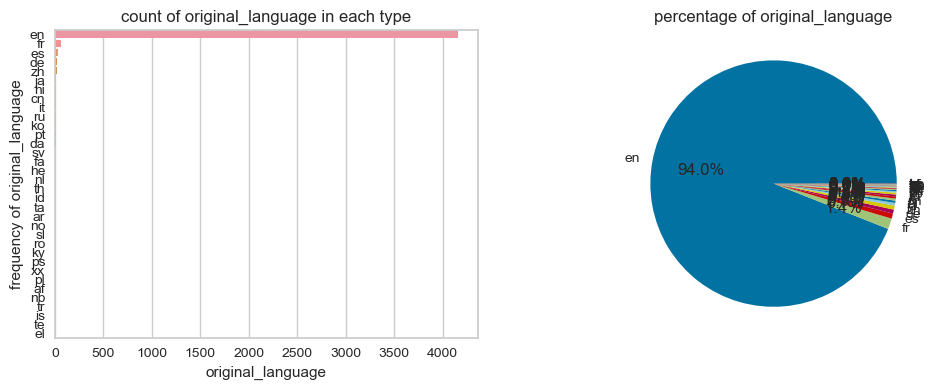

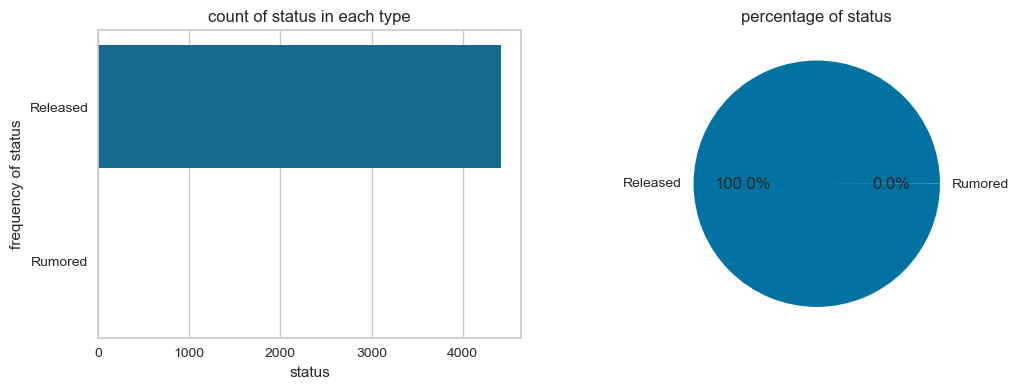

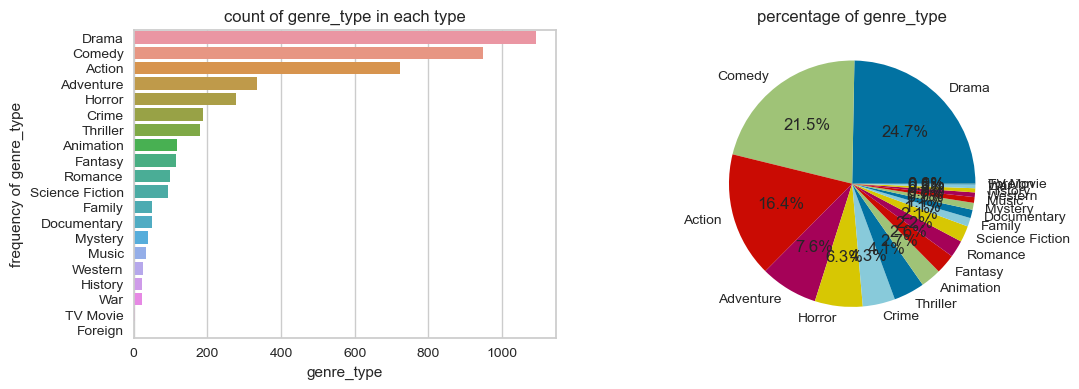

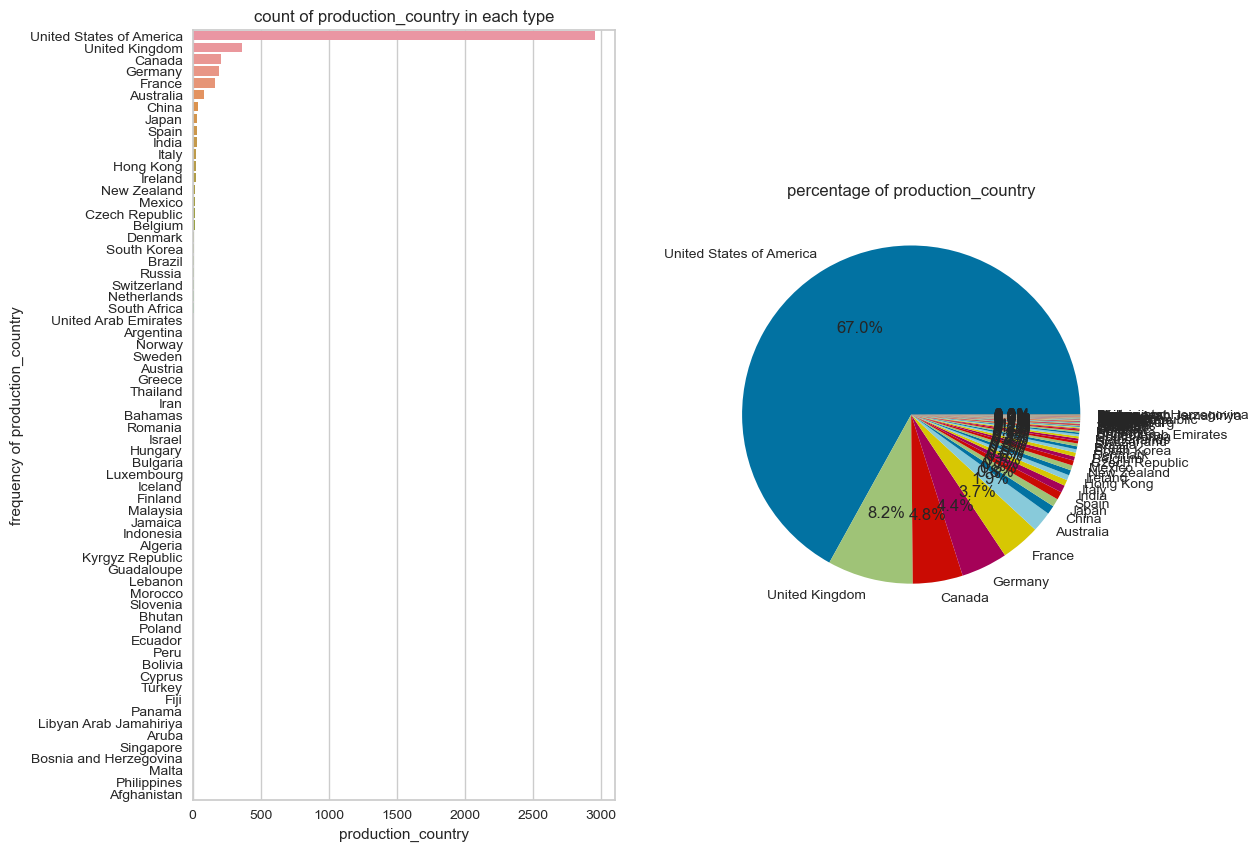

In [39]:
 bar_pie('original_language',
 'status',
 'genre_type',
 'production_country',)

1. almost all the movies are from USA
2. Almost all the movies released in english
3. Drama,comedy and action genres are mostly available in the data

## Univariate for Numerical columns

In [40]:
def hist_box(*s):
    for col in s:
        values=movie_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(values,bins=20,ax=ax[0])
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=movie_data[col],ax=ax[1])
        ax[1].set_title(f"Distribution using boxplot of {col}")

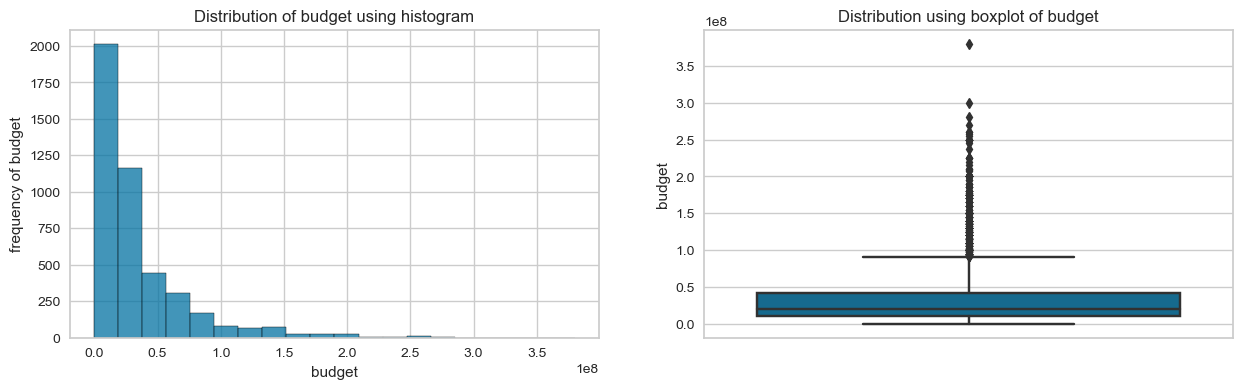

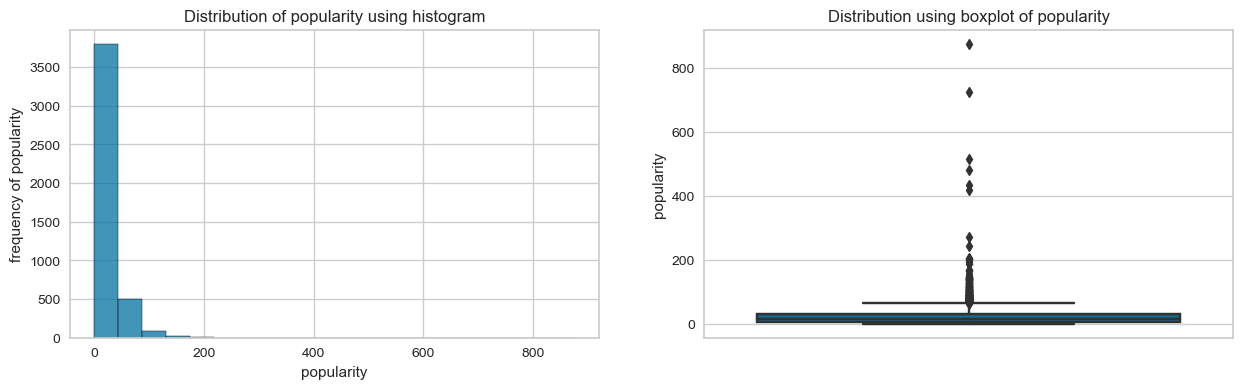

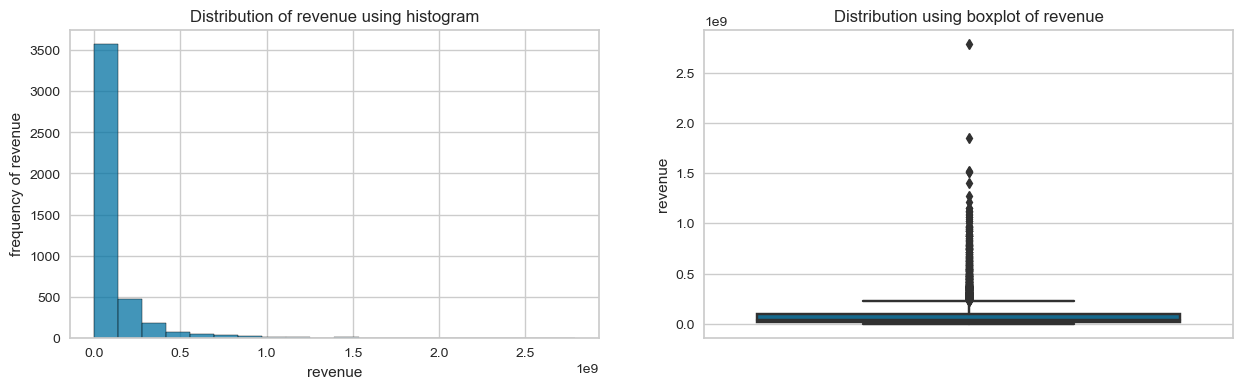

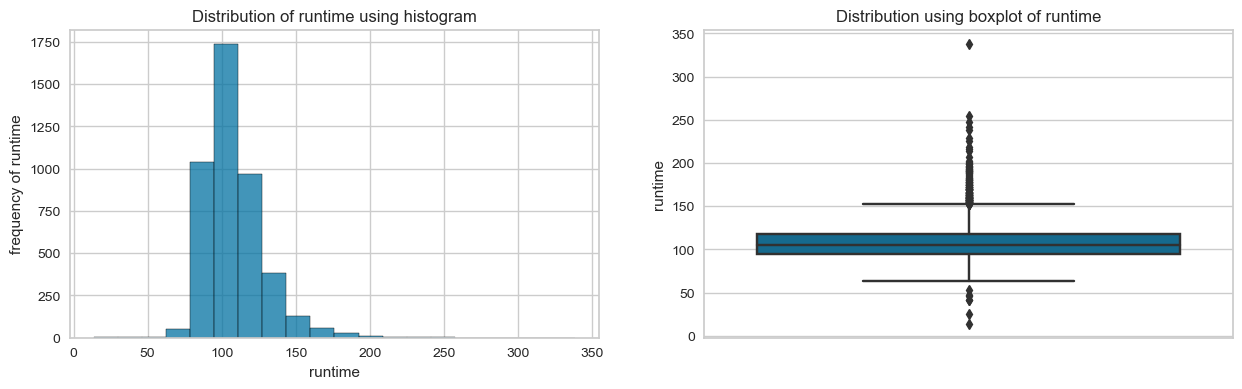

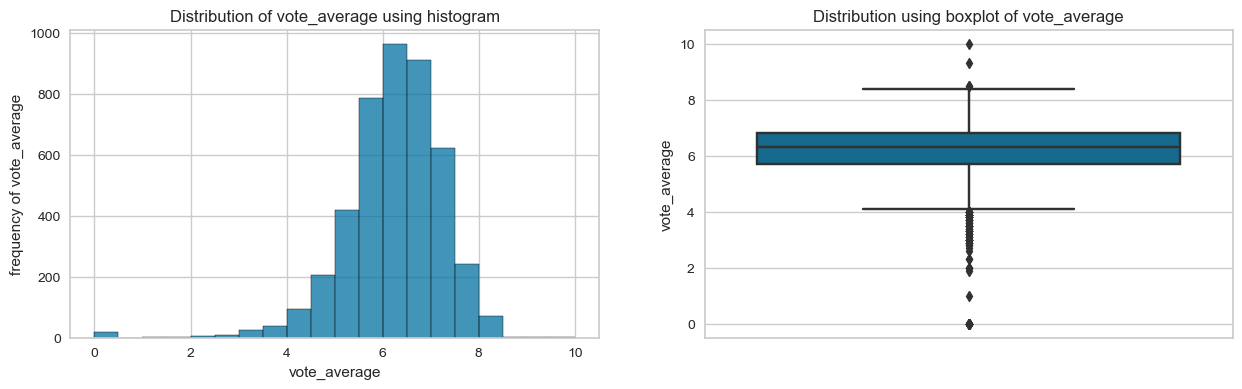

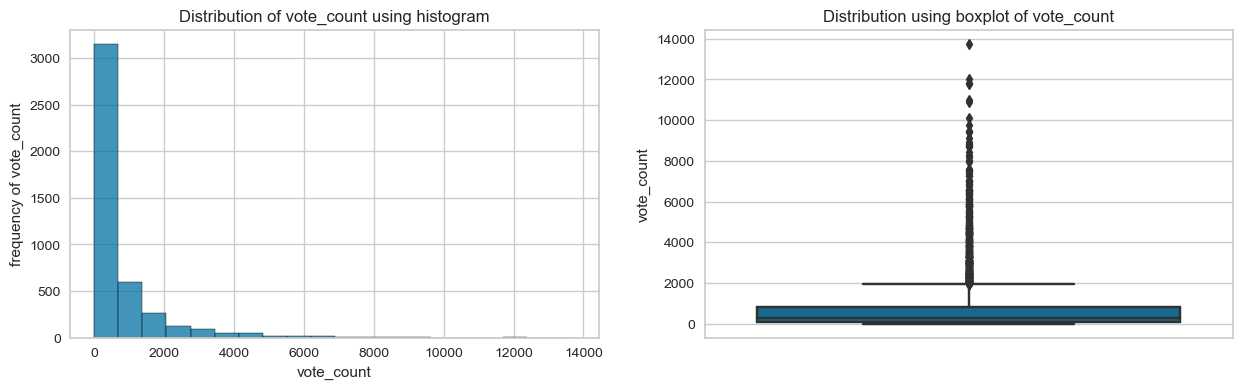

In [41]:
hist_box("budget","popularity","revenue","runtime","vote_average","vote_count")

1. Most of the movie budget is less than 50 million.
2. Most of the movies popularity is under 100.
3. Movies ryntime is between 80 to 130.
4. Most of the movies vote average is in 5 to 7

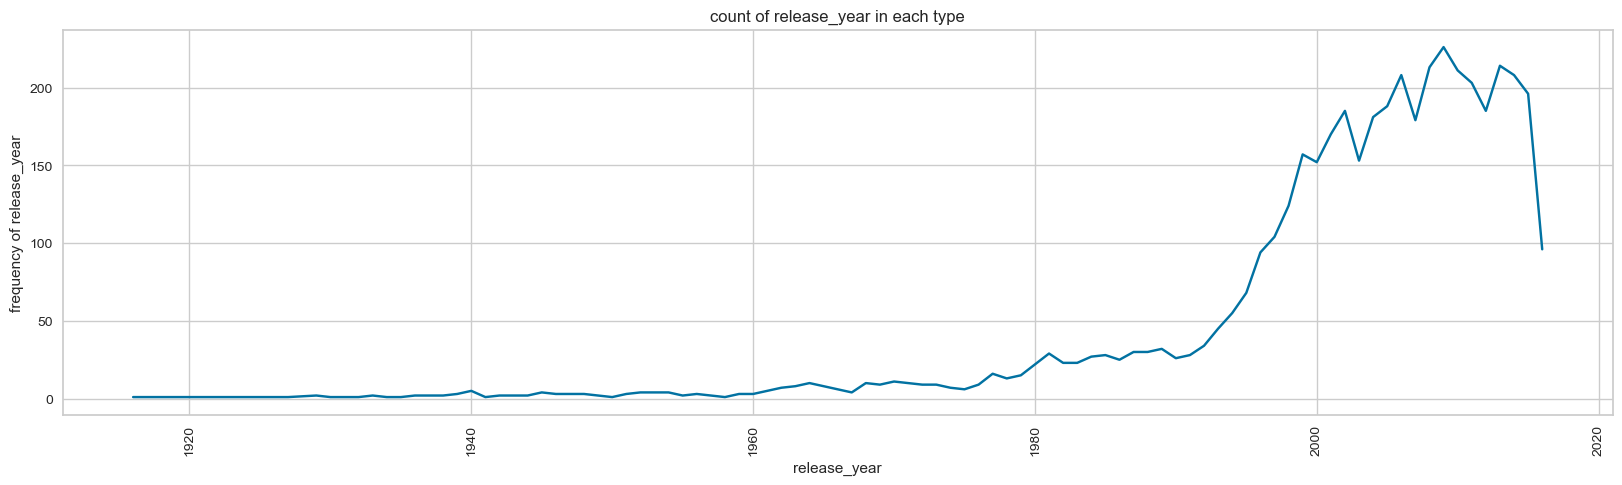

In [42]:
value_counts=movie_data["release_year"].value_counts()
plt.figure(figsize=(20,5))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_year in each type")
plt.xlabel("release_year")
plt.ylabel("frequency of release_year")
plt.xticks(rotation=90)
plt.show()

1. In data most of the movies are from the year 1900 to 1700.

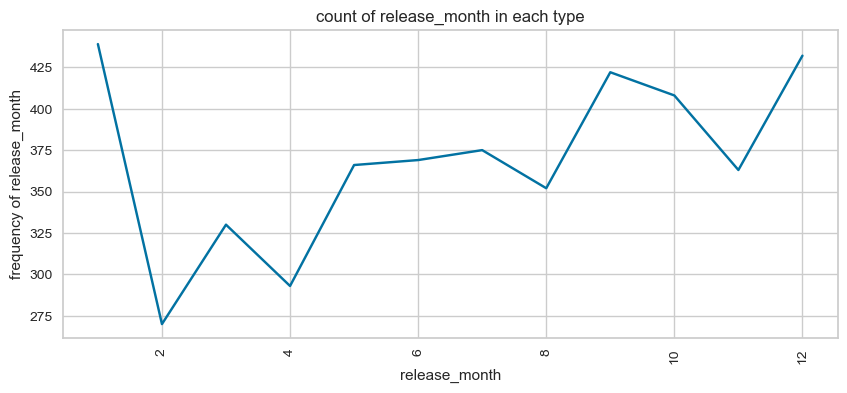

In [43]:
value_counts=movie_data["release_month"].value_counts()
plt.figure(figsize=(10,4))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_month in each type")
plt.xlabel("release_month")
plt.ylabel("frequency of release_month")
plt.xticks(rotation=90)
plt.show()

1. Most of the released in December and January.

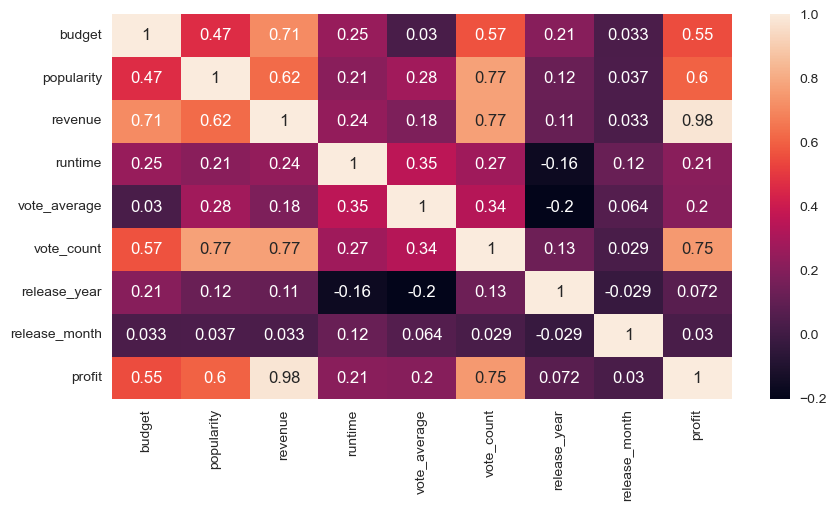

In [44]:
plt.figure(figsize=(10,5))
cm=movie_data.corr()
sns.heatmap(cm,annot=True)
plt.show()

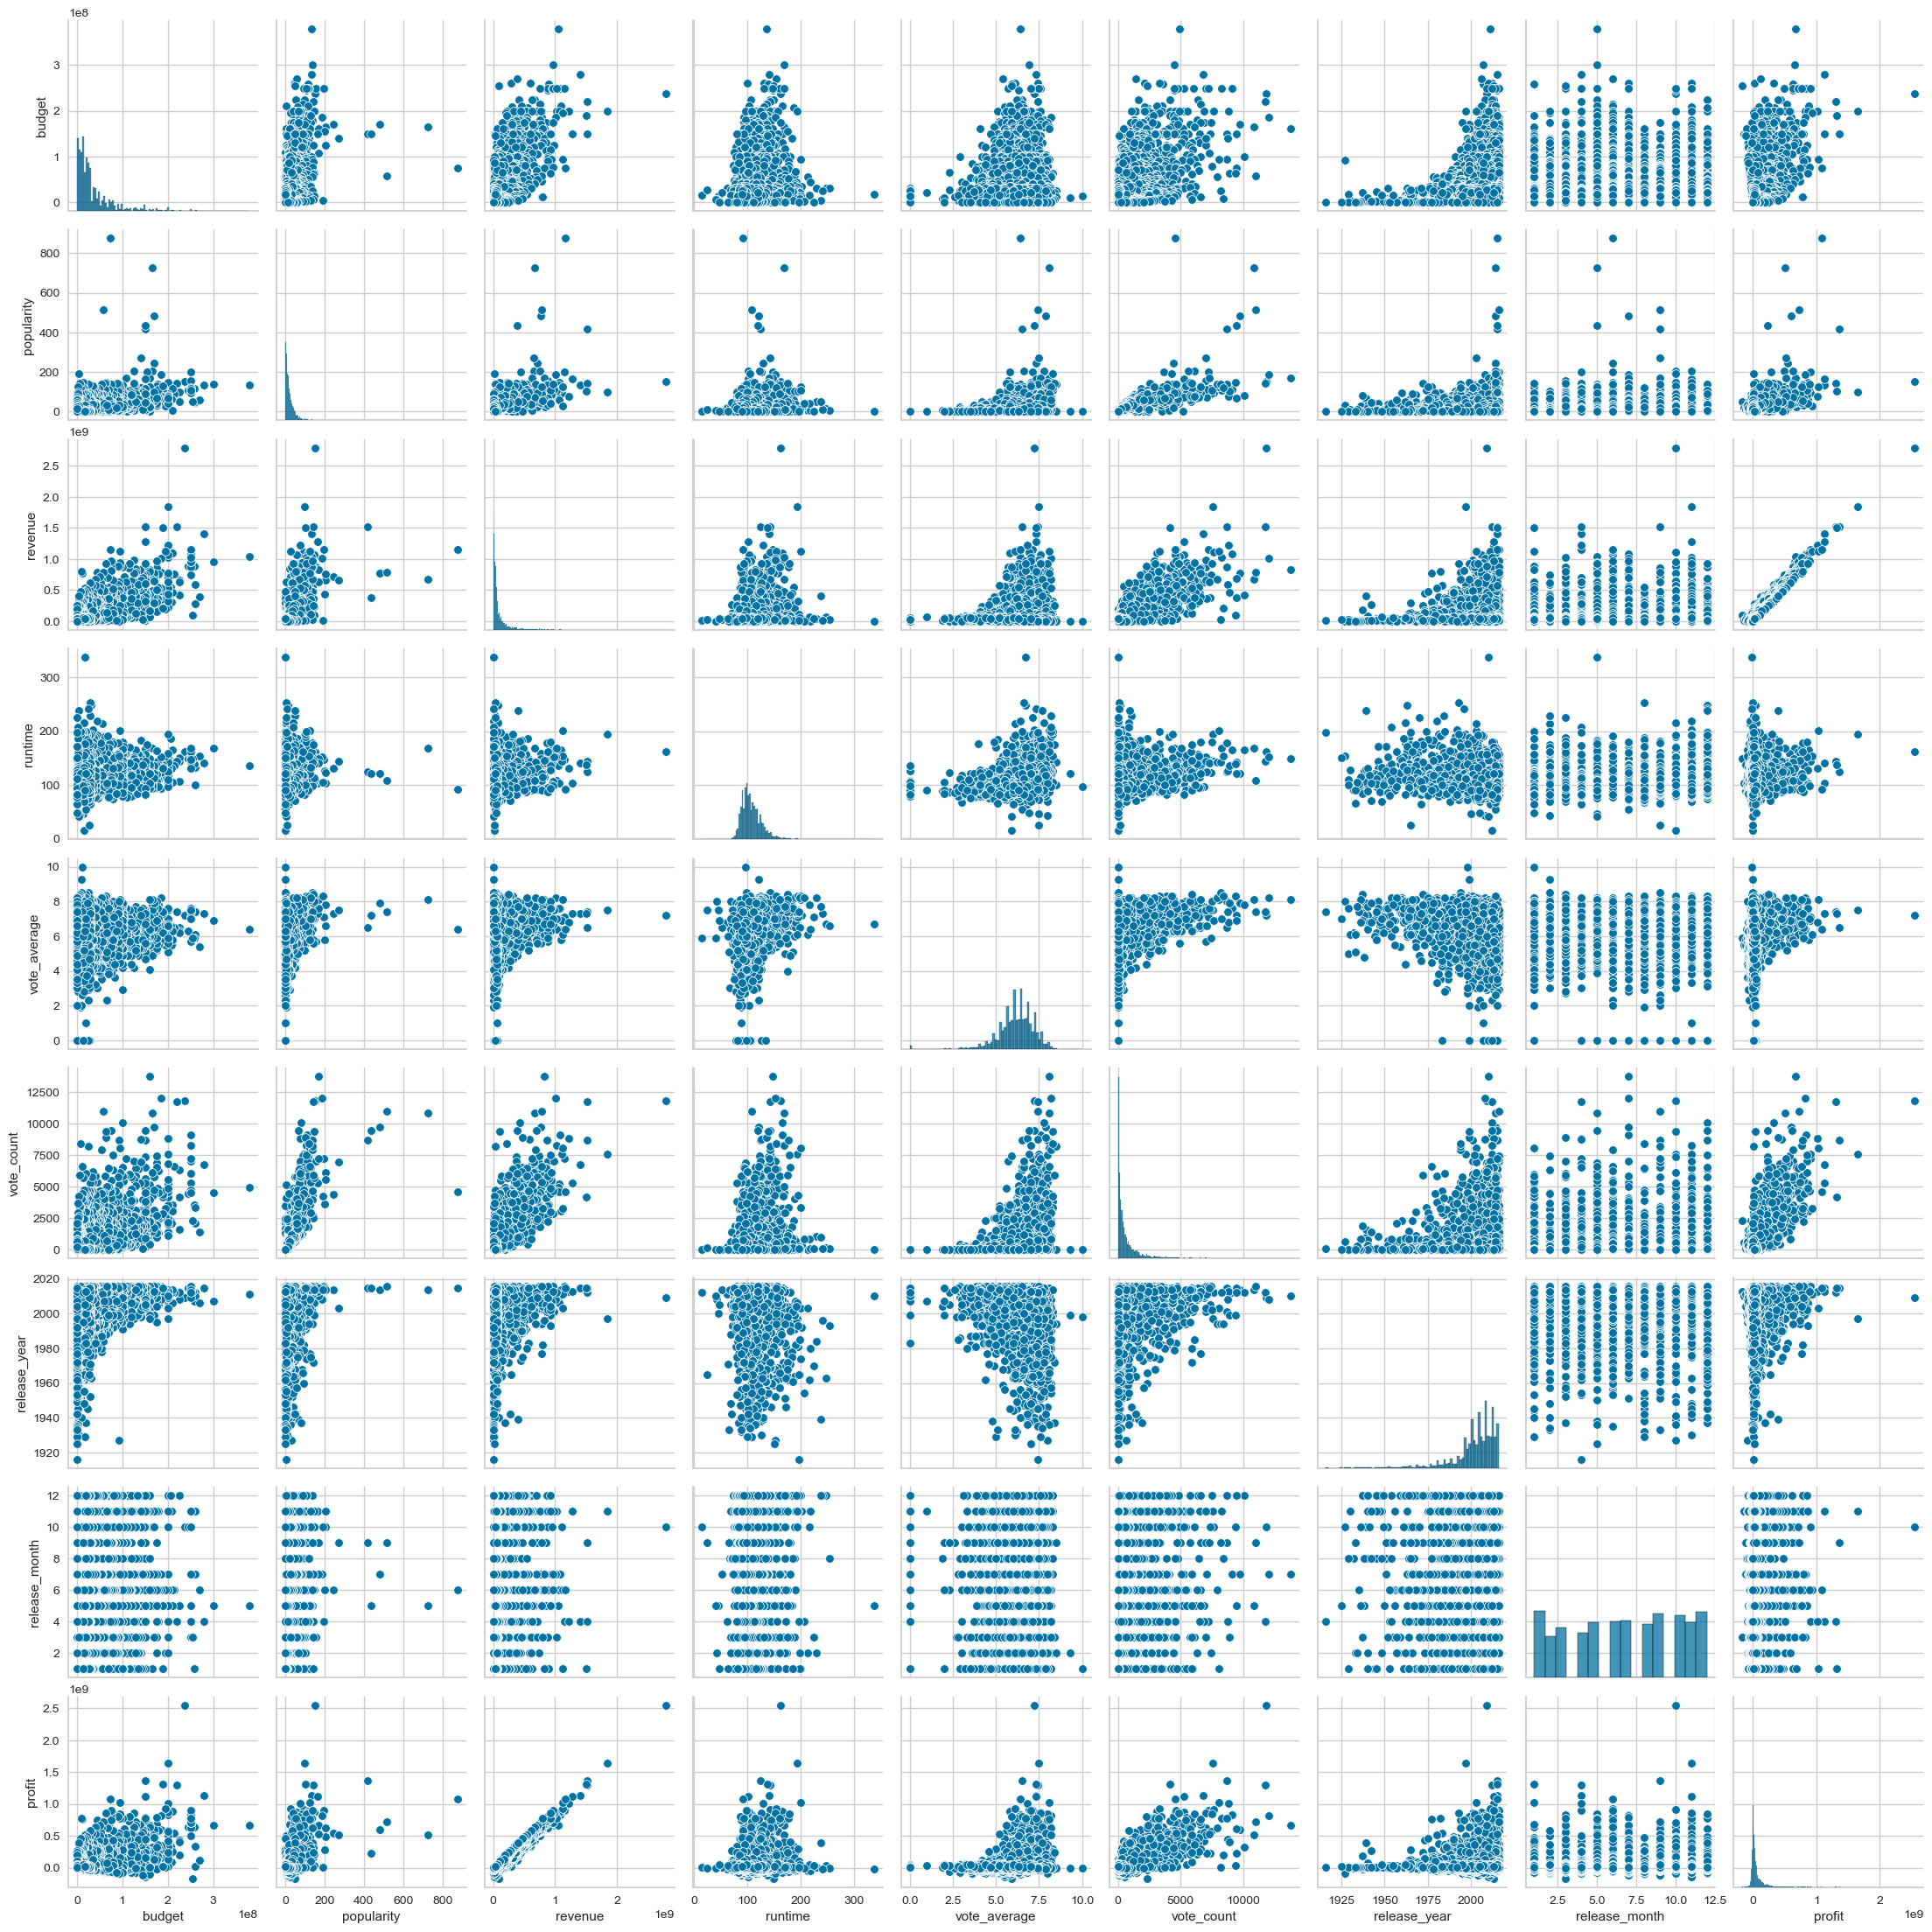

In [45]:
sns.pairplot(movie_data)
plt.show()

## Bivariate

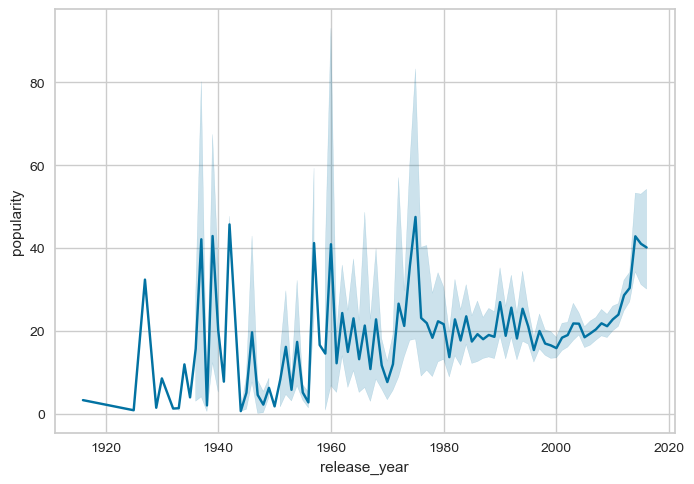

In [46]:
sns.lineplot(x="release_year",y="popularity",data=movie_data)
plt.show()

1. Profits are gradually increasing year by year

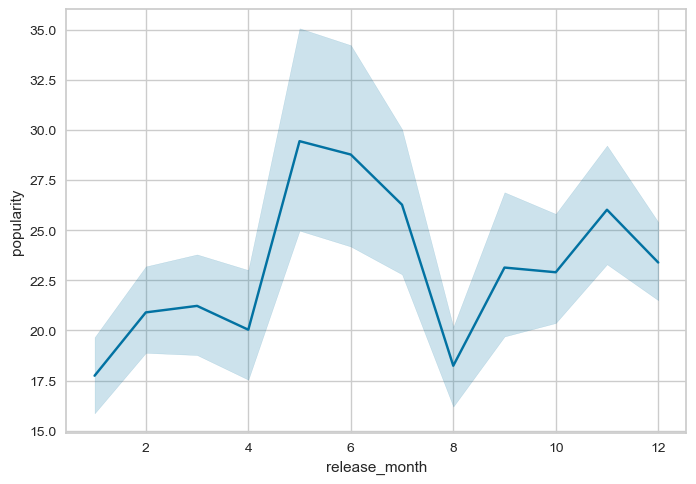

In [47]:
sns.lineplot(x="release_month",y="popularity",data=movie_data)
plt.show()

1. Movies released in May,June and July give figh profit

In [48]:
def cat_profits(col):
    plt.figure(figsize=(5,3))
    top_10 = movie_data.groupby(movie_data[col])['profit'].sum()
    top_10=top_10.sort_values(ascending=False).head(5)
    sns.barplot(y=top_10.index,x=top_10.values)
    plt.xlabel("Profit")
    plt.show()

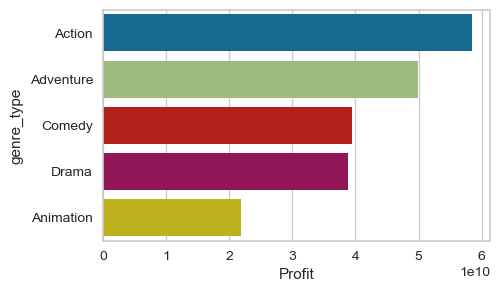

In [49]:
cat_profits("genre_type")

1. Action genre movies are getting highest profit in total.

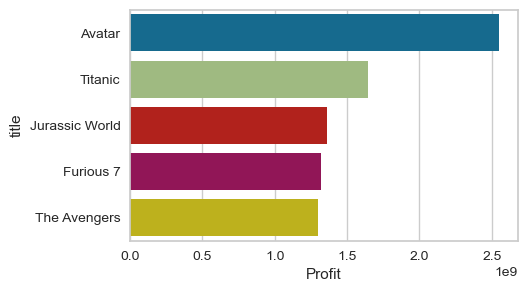

In [50]:
cat_profits("title")

1. Avatar movie is getting highest profit in total.

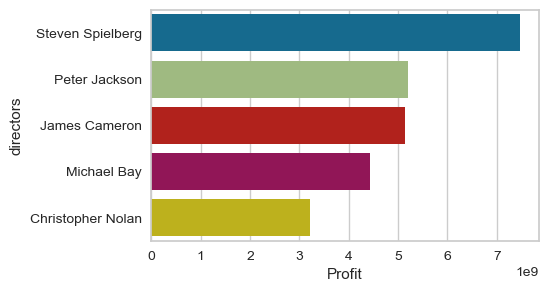

In [51]:
cat_profits("directors")

1. Steven Spielberg is the director who got highest profit

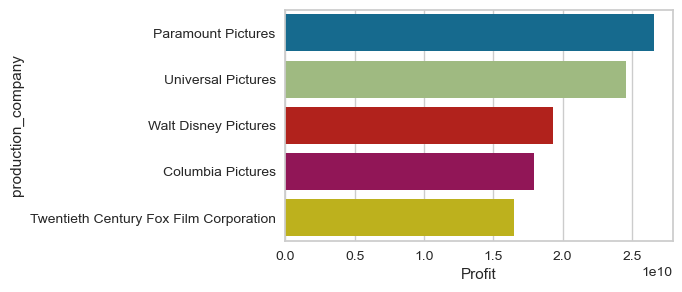

In [52]:
cat_profits("production_company")

1. Paramount pictures and universal pictures got highest profit

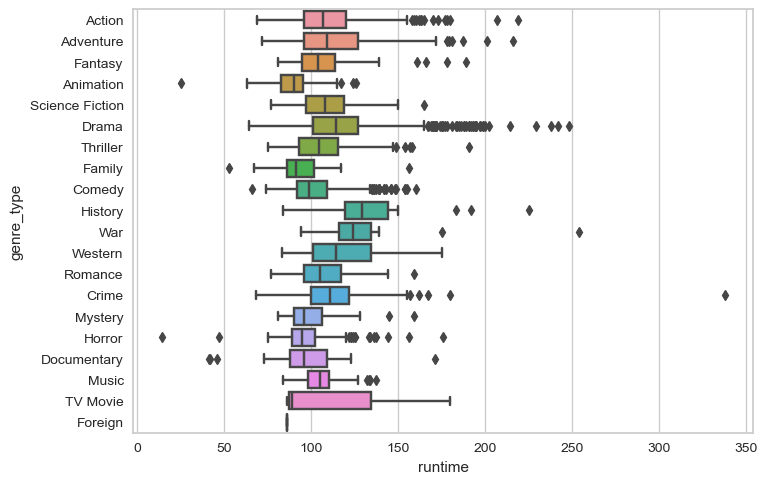

In [53]:
sns.boxplot(x="runtime",y="genre_type",data=movie_data)
plt.show()

1. Historiral movies generally have high runtime

In [54]:
def cat_ratings(col):
    plt.figure(figsize=(5,5))
    top_10 = movie_data.groupby(movie_data[col])['vote_average'].mean()
    top_10=top_10.sort_values(ascending=False)
    sns.barplot(y=top_10.index,x=top_10.values)
    plt.xlabel("vote_average")
    plt.show()

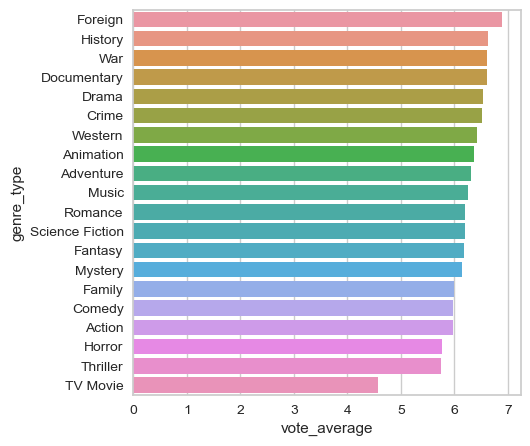

In [55]:
cat_ratings("genre_type")

1. Foreign and histore genre type movies have high vote average/

In [56]:
def cat_genre(col):
    plt.figure(figsize=(5,5))
    top_10 = movie_data.groupby(movie_data["genre_type"])[col].mean()
    top_10=top_10.sort_values(ascending=False).head(5)
    sns.barplot(y=top_10.index,x=top_10.values)
    plt.xlabel(f"{col}")
    plt.show()

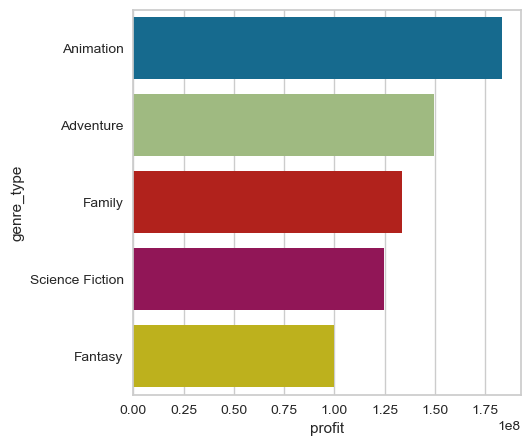

In [57]:
cat_genre("profit")

1. Animation and Adventure movies gain highest average profit.

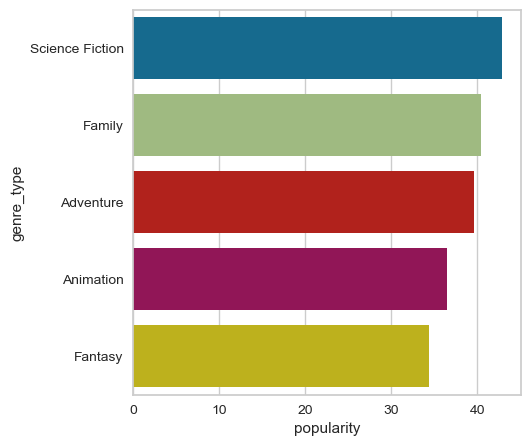

In [58]:
cat_genre("popularity")

1. Animation and Adventure movies gain highest average popularity.

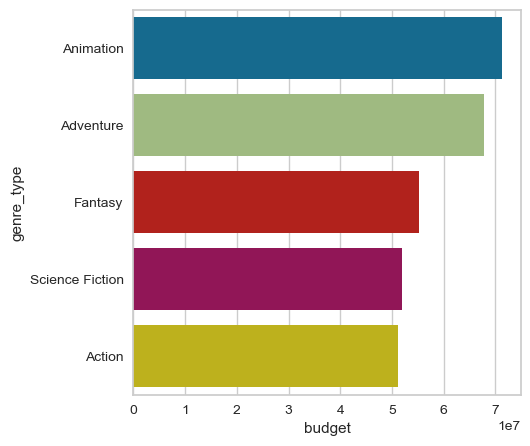

In [59]:
cat_genre("budget")

1. Animation and Adventure movies gain highest average Budget.

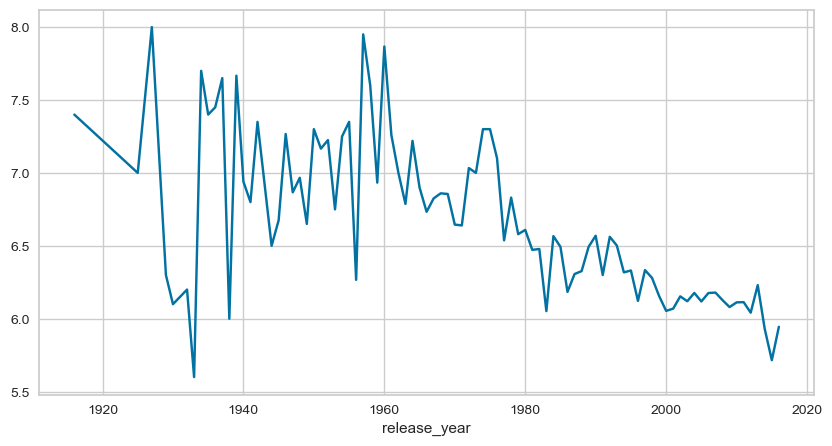

In [60]:
plt.figure(figsize=(10,5))
task = movie_data.groupby(movie_data['release_year'])['vote_average'].mean()
sns.lineplot(x=task.index,y=task.values)
plt.show()

1. Vote average is decreasing year by year.

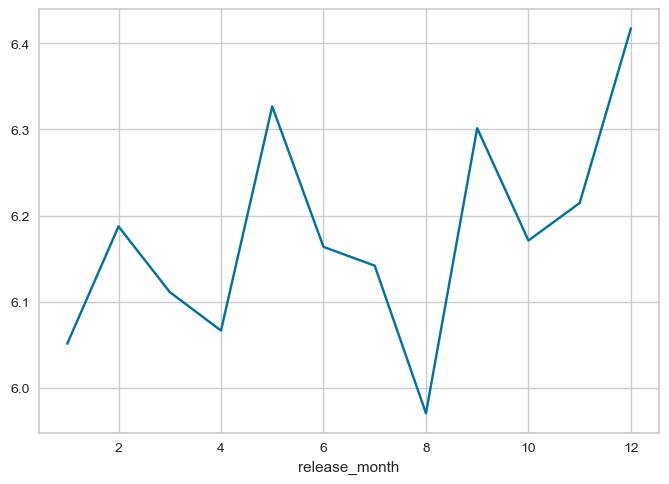

In [61]:
task = movie_data.groupby(movie_data['release_month'])['vote_average'].mean()
sns.lineplot(x=task.index,y=task.values)
plt.show()

1. January,April and August month released movies are containing less vote average.

## Multivariate

### 1. Show top 10 action movies which are released after 2012 based on revenue

In [62]:
task1=movie_data[(movie_data["status"]=="Released") & (movie_data["release_year"]>2011)]
task1=task1.sort_values("revenue",ascending=False).head(10)

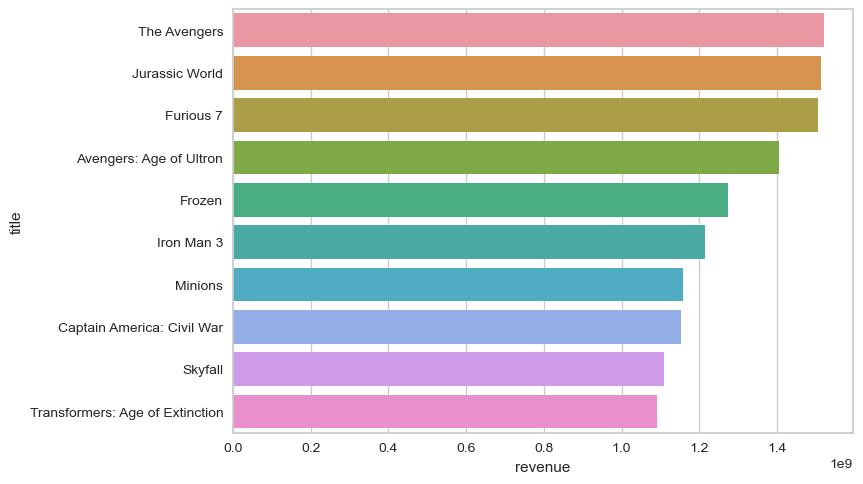

In [63]:
sns.barplot(y=task1["title"],x=task1["revenue"])
plt.show()

### 2. Show top 10 popular drama type english movies with minimum runtime 150 mins.

In [64]:
task2=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["original_language"]=="en") & (movie_data["runtime"]>=150)]
task2=task2.sort_values("popularity",ascending=False).head(10)

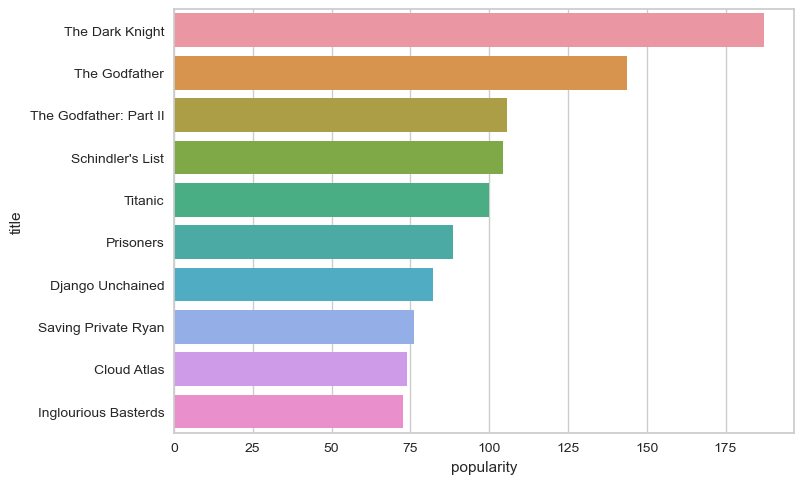

In [65]:
sns.barplot(y=task2["title"],x=task2["popularity"])
plt.show()

### 3.Top 10 directors based on total profit who released movie in between 2000 to 2010 and popularity over 100.

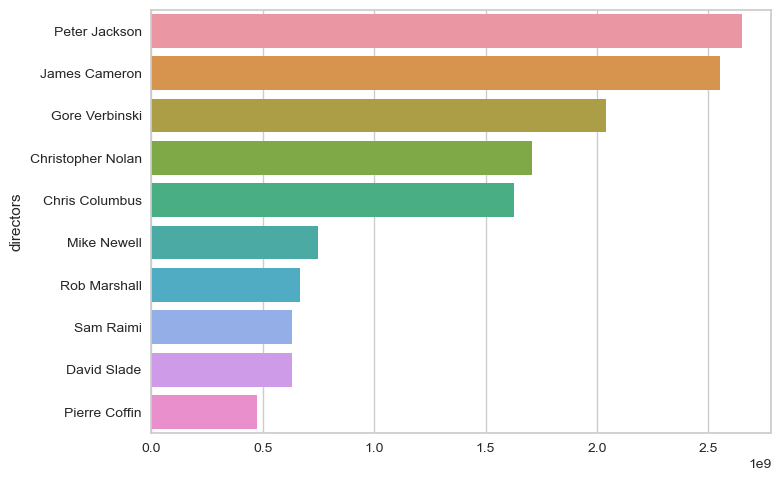

In [66]:

task3=movie_data[(movie_data["popularity"]>=100) & (movie_data["release_year"].between(2000,2011))]
task3 = task3.groupby(task3['directors'])['profit'].sum()
task3=task3.sort_values(ascending=False).head(10)
sns.barplot(y=task3.index,x=task3.values)
plt.show()

### 4. Top 10 popular movie's lead actor's name who worked with Walt Disney Pictures movie production company and did comedy movie.

In [67]:
task4=movie_data[(movie_data["production_company"]=="Walt Disney Pictures") & (movie_data["genre_type"]=="Comedy")]
task4=task4.sort_values("popularity",ascending=False).head(10)

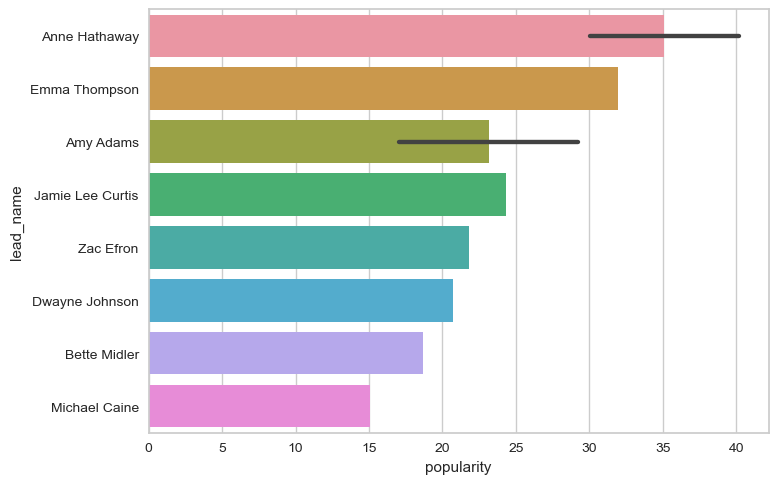

In [68]:
sns.barplot(y=task4["lead_name"],x=task4["popularity"])
plt.show()

### 5. Top 10 directors with highest budget that movie released after 2010 and avg vote got more than 5 and released in the month of may or june.

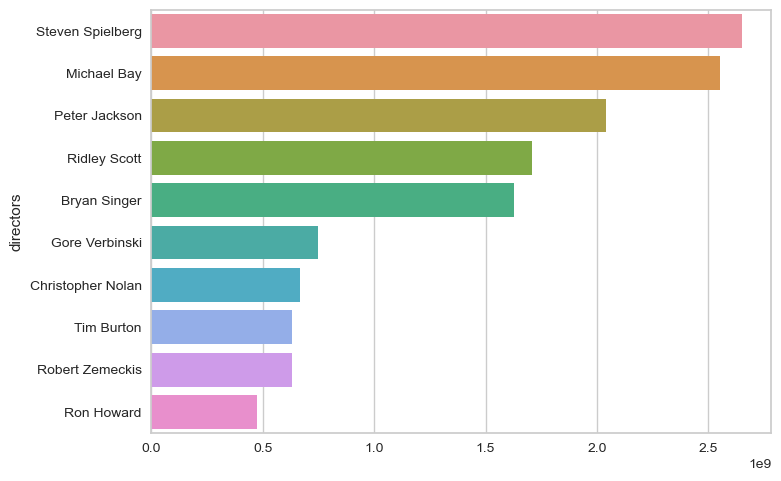

In [69]:

task5=movie_data[(movie_data["vote_average"]>5) & (movie_data["release_year"]>2010) & (movie_data["release_month"].between(5,7))]
task5 = movie_data.groupby(movie_data['directors'])['budget'].sum()
task5=task5.sort_values(ascending=False).head(10)
sns.barplot(y=task5.index,x=task3.values)
plt.show()

### 6. Top 5  drama type movies based on profit which released May, June or November month.

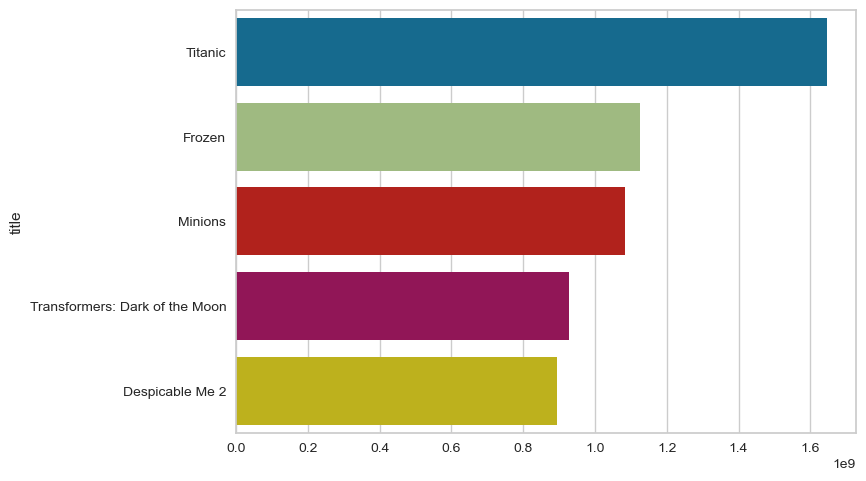

In [70]:
task6=movie_data[(movie_data["production_country"]=="United States of America") & ((movie_data["release_month"].between(5,6))|(movie_data["release_month"]==11))]
task6 = task6.groupby(task6['title'])['profit'].sum()
task6=task6.sort_values(ascending=False).head(5)
sns.barplot(y=task6.index,x=task6.values)
plt.show()

### 7. Top 5 action type english movies based on budget which released between april to august

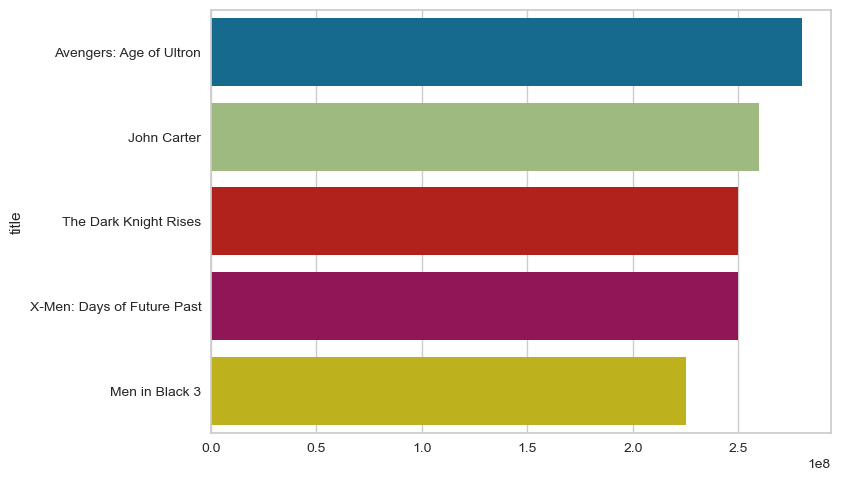

In [71]:
task7=movie_data[(movie_data["genre_type"]=="Action") & (movie_data["release_month"].between(4,8))&(movie_data["original_language"]=="en")]
task7 = task7.groupby(task7['title'])['budget'].sum()
task7=task7.sort_values(ascending=False).head(5)
sns.barplot(y=task7.index,x=task7.values)
plt.show()

### exporting data as csv file

In [64]:
# movie_data.to_csv("movie_data.csv")

##  -----------------------------------------------------Machine Learning-----------------------------------------------------

In [93]:
new_data=movie_data.copy()
new_data.reset_index(drop=True,inplace=True)
new_data.head(2)

budget original_language  popularity       revenue  runtime    status  \
0  237000000.0                en  150.437577  2.787965e+09    162.0  Released   
1  300000000.0                en  139.082615  9.610000e+08    169.0  Released   

   vote_average  vote_count                                     title  \
0           7.2       11800                                    Avatar   
1           6.9        4500  Pirates of the Caribbean: At World's End   

   release_year  release_month genre_type        production_country  \
0        2009.0           10.0     Action  United States of America   
1        2007.0            5.0  Adventure  United States of America   

         lead_name       production_company   lead_chatacter_name  \
0  Sam Worthington  Ingenious Film Partners            Jake Sully   
1      Johnny Depp     Walt Disney Pictures  Captain Jack Sparrow   

        directors        profit  
0   James Cameron  2.550965e+09  
1  Gore Verbinski  6.610000e+08

In [94]:
# creating new column as "rating" that is based on vote_average.
new_data["rating"]=0
mean=new_data["vote_average"].mean()
new_data["rating"][new_data["vote_average"]> mean]="Good"
new_data["rating"][new_data["vote_average"]<= mean]="Poor"

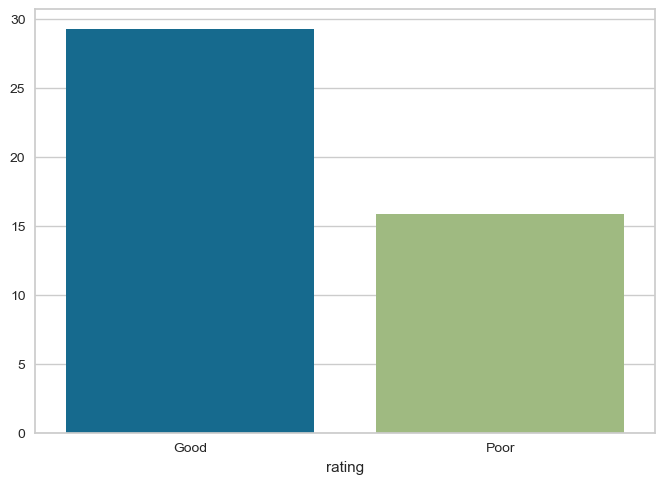

In [97]:
task3 = new_data.groupby(new_data['rating'])['popularity'].mean()
sns.barplot(x=task3.index,y=task3.values)
plt.show()

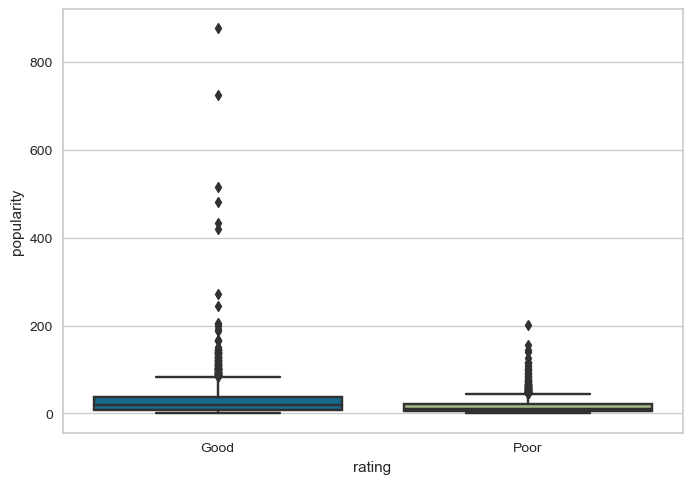

In [98]:
sns.boxplot(x="rating",y="popularity",data=new_data)
plt.show()

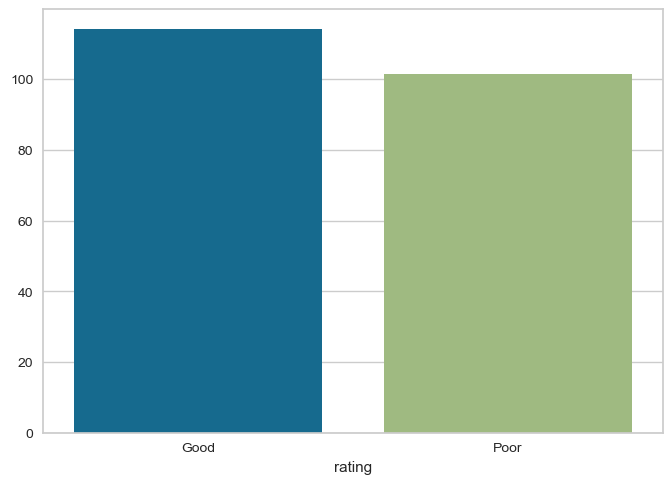

In [101]:
task3 = new_data.groupby(new_data['rating'])['runtime'].mean()
sns.barplot(x=task3.index,y=task3.values)
plt.show()

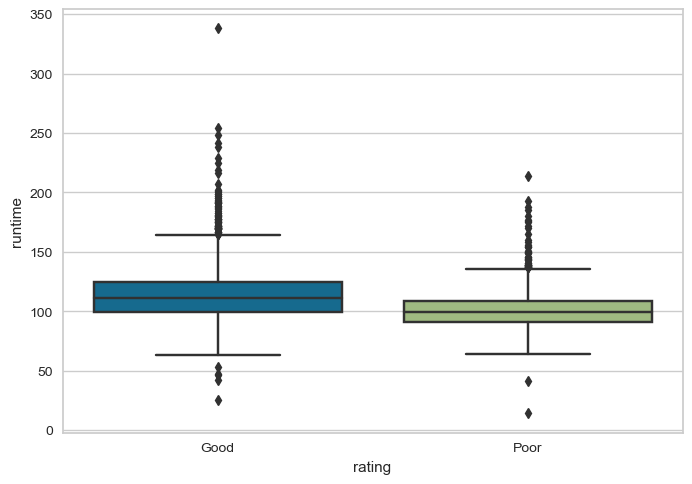

In [102]:
sns.boxplot(x="rating",y="runtime",data=new_data)
plt.show()

In [103]:
# new_data=new_data[new_data["rating"]==1]
# new_data.head(2)

In [104]:
new_data.isnull().sum()

budget                 0
original_language      0
popularity             0
revenue                0
runtime                0
status                 0
vote_average           0
vote_count             0
title                  0
release_year           0
release_month          0
genre_type             0
production_country     0
lead_name              0
production_company     0
lead_chatacter_name    0
directors              0
profit                 0
rating                 0
dtype: int64

## Correlations between features

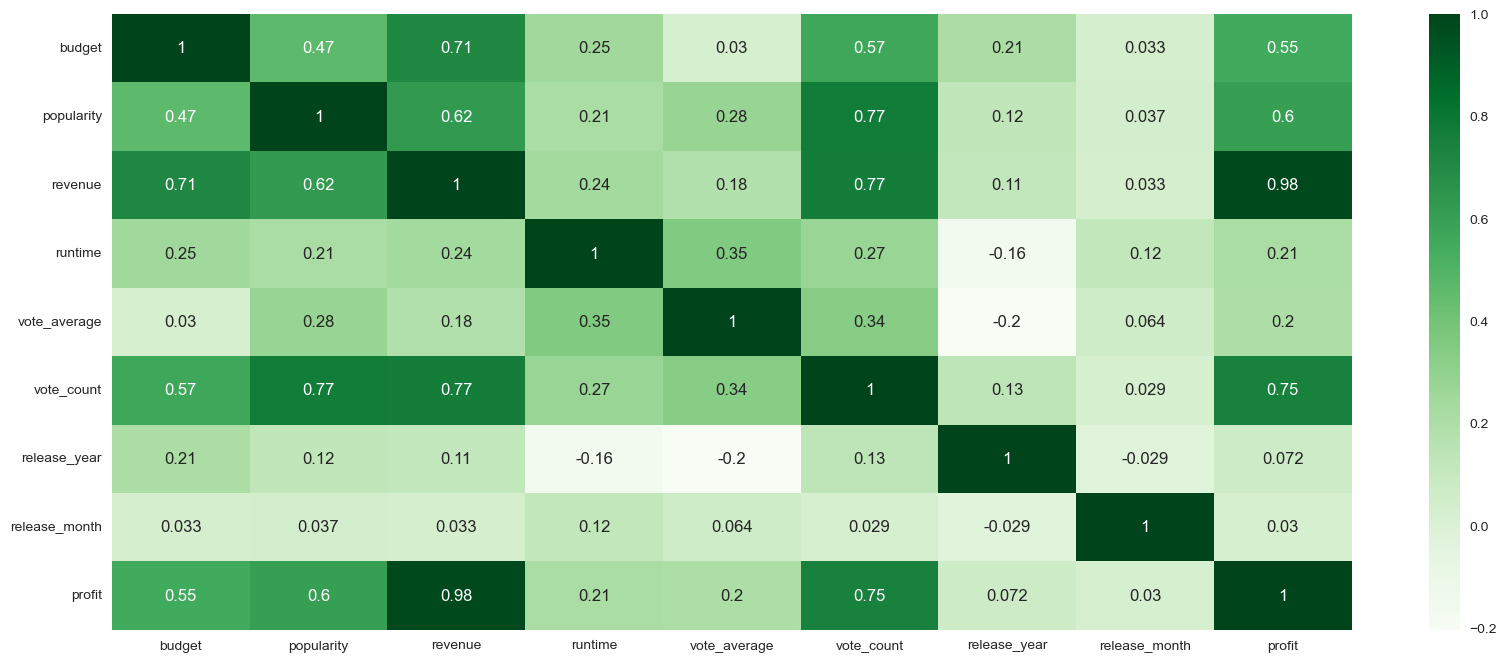

In [65]:
# correlations between the features
correlation_matrix=new_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix,annot=True,cmap="Greens")
plt.show()

### Feature selection by dropping unnecessary columns

In [66]:
ratings=new_data["rating"]
new_data.drop(["rating"],axis=1,inplace=True)

## Feature Extraction

In [ ]:
# converting all categorical values to numerical values.
for col in new_data.select_dtypes("object"):
     new_data[col]=LabelEncoder().fit_transform(new_data[col])

In [72]:
# converting all categorical values to numerical values.
for col in new_data.select_dtypes("object"):
     new_data[col]=LabelEncoder().fit_transform(new_data[col])

### Scaling  data

In [75]:
scaled_data=StandardScaler().fit_transform(new_data)
scaled_data=pd.DataFrame(normalize(scaled_data),columns=new_data.columns)
scaled_data

budget  original_language  popularity   revenue   runtime    status  \
0     0.189398          -0.005767    0.145648  0.610024  0.097101 -0.000561   
1     0.592719          -0.013768    0.316658  0.467606  0.262067 -0.001340   
2     0.543955          -0.015935    0.266200  0.490891  0.198228 -0.001551   
3     0.422029          -0.012076    0.213576  0.468982  0.214699 -0.001175   
4     0.843704          -0.023072    0.094820  0.169802  0.171092 -0.002246   
...        ...                ...         ...       ...       ...       ...   
4414 -0.148585          -0.042869   -0.189841 -0.066393 -0.139827 -0.004173   
4415 -0.215721          -0.038716    0.000635 -0.146805 -0.381598 -0.003768   
4416 -0.247466           0.056897   -0.079451 -0.166620 -0.384347 -0.004350   
4417 -0.131246          -0.056293   -0.243405 -0.128850  0.205302 -0.005479   
4418 -0.150175          -0.056550   -0.239066 -0.138506 -0.326518 -0.005504   

      vote_average  vote_count     title  release_year  release_month  \
0         0.037379    0.324642 -0.054360      0.020036       0.034958   
1         0.062918    0.263060  0.015095      0.033804      -0.043633   
2         0.011909    0.301702  0.057164      0.104054       0.096587   
3         0.109044    0.514061  0.068258      0.060406       0.006316   
4        -0.012155    0.161610 -0.054182      0.115409       0.012068   
...            ...         ...       ...           ...            ...   
4414     -0.049895   -0.163297 -0.396018     -0.156763       0.180706   
4415      0.176928   -0.017915  0.052662      0.035900       0.091724   
4416      0.118816   -0.116284 -0.261840     -0.231709      -0.224134   
4417      0.293120   -0.212998  0.173958      0.310251       0.341216   
4418      0.042264   -0.211089 -0.007138      0.081241      -0.179217   

      genre_type  production_country  lead_name  production_company  \
0      -0.041706            0.020127   0.043342           -0.014489   
1      -0.080647            0.048048  -0.008309            0.114575   
2      -0.115232            0.050179  -0.104719           -0.132306   
3      -0.087330            0.042145  -0.089575           -0.013934   
4      -0.166848            0.080519   0.214369            0.192006   
...          ...                 ...        ...                 ...   
4414    0.043369            0.149607  -0.274474           -0.473876   
4415    0.517875            0.135112   0.313873            0.263674   
4416   -0.323175           -0.179131  -0.366040           -0.371062   
4417   -0.175067            0.196455  -0.272690           -0.271435   
4418   -0.020482            0.197351  -0.317658            0.523417   

      lead_chatacter_name  directors    profit  
0               -0.007605  -0.017423  0.667354  
1               -0.111389  -0.056821  0.383155  
2               -0.019533   0.114557  0.424693  
3               -0.102469  -0.096591  0.433754  
4               -0.002309  -0.242945 -0.041170  
...                   ...        ...       ...  
4414             0.401690  -0.431336 -0.035918  
4415            -0.431626   0.295625 -0.111789  
4416            -0.209859   0.292288 -0.126123  
4417             0.287707   0.417271 -0.114783  
4418            -0.128714  -0.510648 -0.120775  

[4419 rows x 18 columns]

## Dimetionality Reduction using PCA

In [76]:
pca=PCA().fit(scaled_data)
features=range(pca.n_components_)

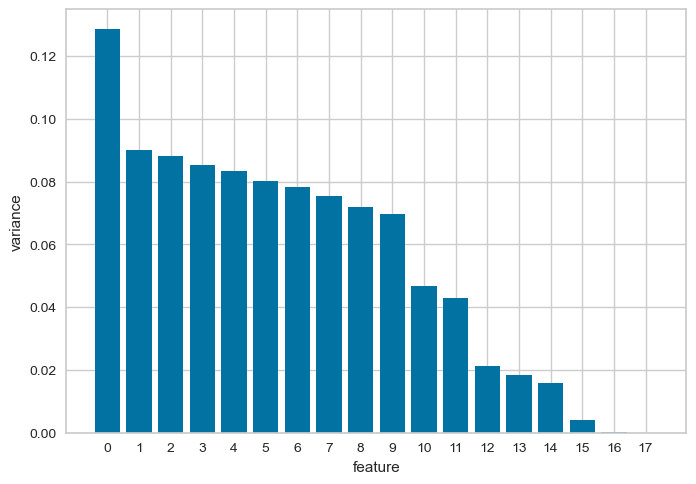

In [77]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel("feature")
plt.ylabel("variance")
plt.xticks(features)
plt.show()

In [78]:
pca_transformed=PCA(n_components=2,random_state=42).fit_transform(scaled_data)
pca_transformed

array([[ 0.84525108,  0.19452588],
       [ 0.95591491,  0.28721255],
       [ 0.91722925,  0.1099829 ],
       ...,
       [-0.37510335,  0.13241243],
       [-0.04343123, -0.55476039],
       [-0.36873044,  0.34802895]])

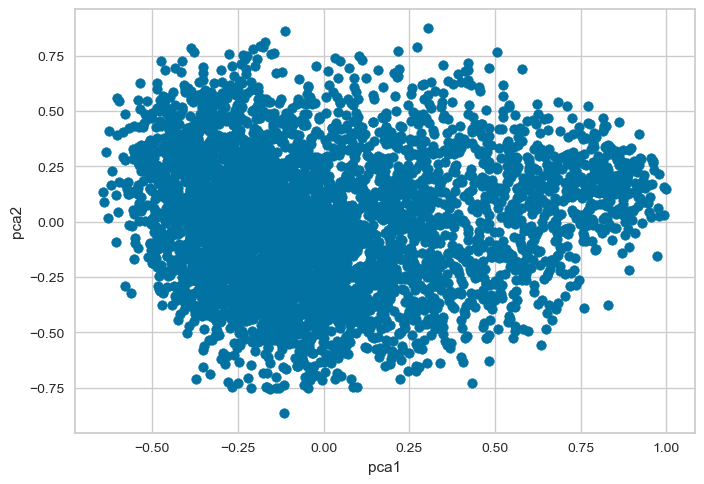

In [79]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1])
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

##  -------------------------------------------------------Model Ctreation-------------------------------------------------------

# KMeans

In [625]:
distortion=[]
for k in range(2,10):
    model=KMeans(n_clusters=k,random_state=42).fit(pca_transformed)
    distortion.append(model.inertia_)

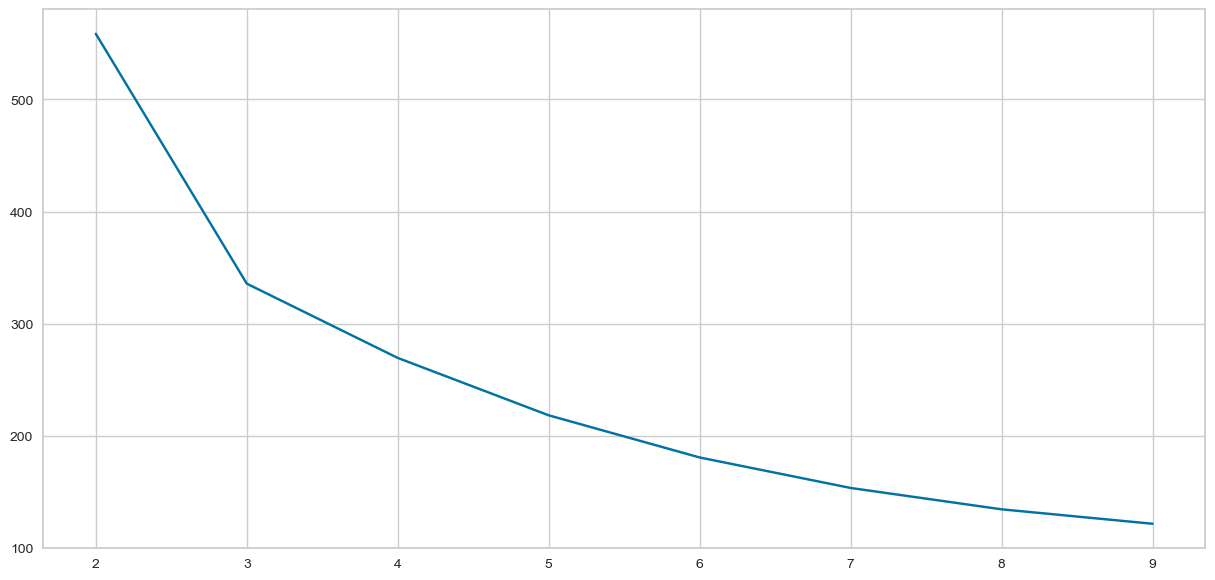

In [626]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(range(2,10),distortion)
plt.show()

In [627]:
k=3
k_model=KMeans(n_clusters=k,random_state=42).fit(pca_transformed)
k_labels=k_model.labels_

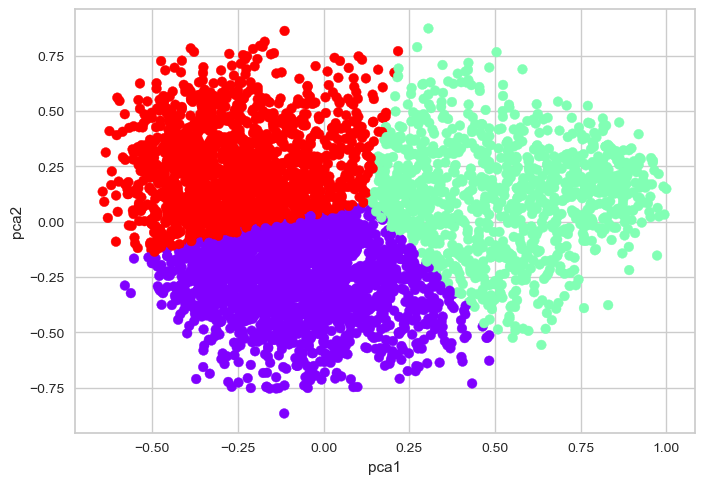

In [628]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=k_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [629]:
for k in range(2,10):
    km_model=KMeans(n_clusters=k,random_state=42).fit(pca_transformed)
    km_labels=km_model.predict(pca_transformed)
    score=silhouette_score(pca_transformed,km_labels,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: 0.42092264148709074
for k 3 score: 0.40384401189170804
for k 4 score: 0.347986636736216
for k 5 score: 0.35804514867047793
for k 6 score: 0.34707579890574464
for k 7 score: 0.35865551343092406
for k 8 score: 0.34779427007498265
for k 9 score: 0.3448973696549638


# Agglomerative Heirarchical clustering

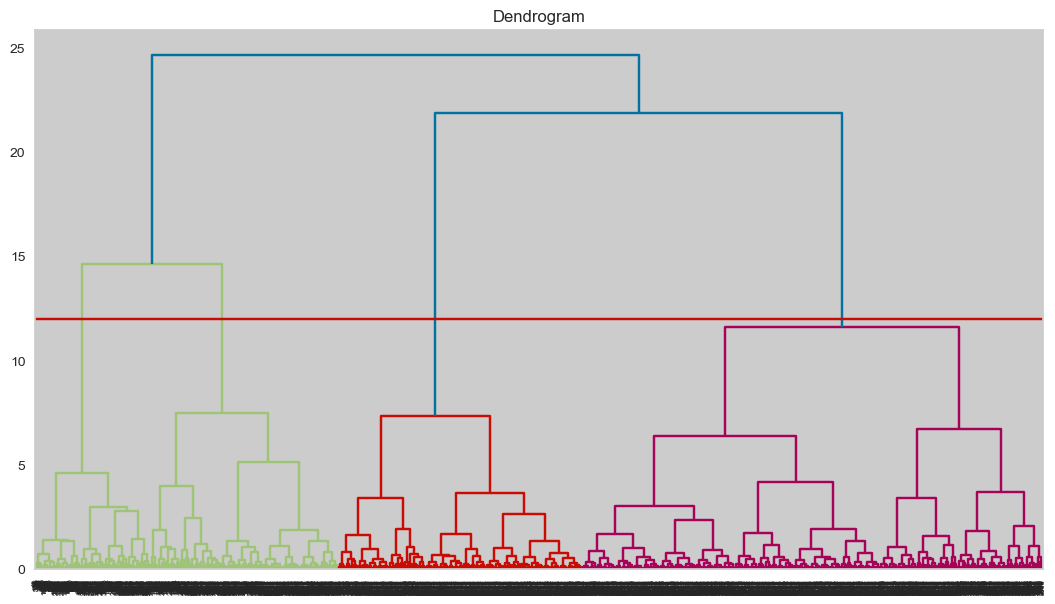

In [588]:
linkage_data=linkage(pca_transformed,method="ward",metric='euclidean')
plt.figure(figsize=(13,7))
dendrogram(linkage_data)
plt.axhline(y=12,c="r")
plt.title("Dendrogram")
plt.show()

In [589]:
hier_model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward").fit(pca_transformed)
hr_labels=hier_model.labels_

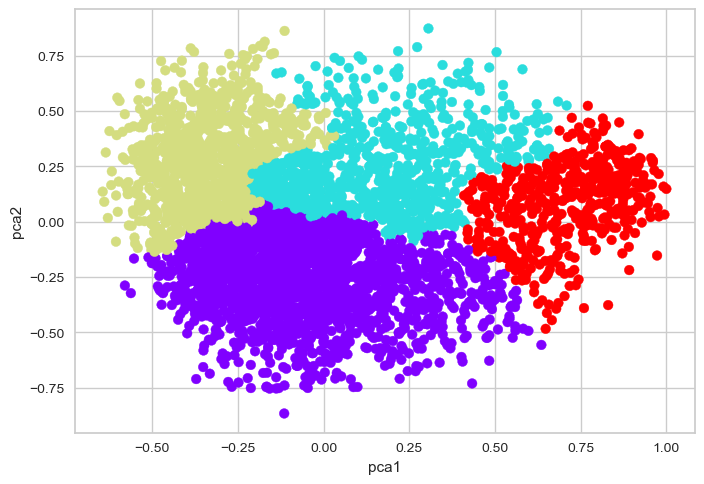

In [590]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=hr_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [591]:
for k in range(2,10):
    hier_model=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward").fit(pca_transformed)
    h_labels=hier_model.labels_
    score=silhouette_score(pca_transformed,h_labels,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: 0.3156990067922963
for k 3 score: 0.34214607521757384
for k 4 score: 0.3418230727420855
for k 5 score: 0.3244879244919078
for k 6 score: 0.3127580110396688
for k 7 score: 0.3009594896427821
for k 8 score: 0.28339084468744297
for k 9 score: 0.295164360474207


# DBSCAN

In [592]:
neigh_fit=NearestNeighbors(n_neighbors=5).fit(pca_transformed)
distance,index=neigh_fit.kneighbors(pca_transformed)

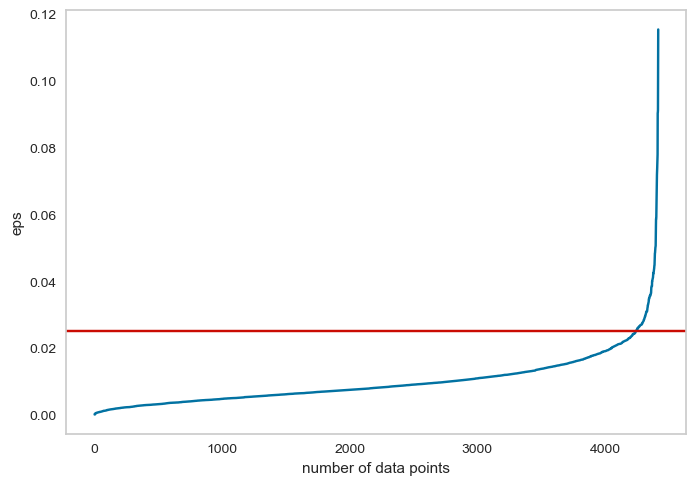

In [593]:
sorted_distance=np.sort(distance,axis=0)
plt.plot(sorted_distance[:,1])
plt.axhline(y=0.025,c="r")
plt.xlabel("number of data points")
plt.ylabel("eps")
plt.grid()
plt.show()

In [594]:
eps=0.025
for i in range(2,17):
    db_model=DBSCAN(eps=eps,min_samples=i).fit(pca_transformed)
    db_labels=db_model.labels_+1
    
    y=np.bincount(db_labels)
    z=np.nonzero(y)[0]
    clusters=list(zip(z,y[z]))
    score=silhouette_score(pca_transformed,db_labels,metric="euclidean")
    print("min_sample:",i,", clusters:",clusters,"score:" ,round(score,4))
    print()

min_sample: 2 , clusters: [(0, 178), (1, 116), (2, 3), (3, 5), (4, 6), (5, 5), (6, 31), (7, 6), (8, 19), (9, 2), (10, 7), (11, 2), (12, 3), (13, 10), (14, 15), (15, 4), (16, 29), (17, 3), (18, 6), (19, 9), (20, 3238), (21, 9), (22, 4), (23, 3), (24, 8), (25, 13), (26, 4), (27, 2), (28, 9), (29, 5), (30, 3), (31, 2), (32, 8), (33, 16), (34, 4), (35, 3), (36, 2), (37, 3), (38, 2), (39, 3), (40, 2), (41, 5), (42, 4), (43, 3), (44, 8), (45, 3), (46, 2), (47, 5), (48, 2), (49, 7), (50, 3), (51, 7), (52, 2), (53, 2), (54, 4), (55, 3), (56, 7), (57, 26), (58, 18), (59, 13), (60, 8), (61, 5), (62, 4), (63, 4), (64, 3), (65, 3), (66, 4), (67, 11), (68, 2), (69, 12), (70, 2), (71, 2), (72, 2), (73, 3), (74, 6), (75, 2), (76, 2), (77, 2), (78, 2), (79, 9), (80, 6), (81, 4), (82, 5), (83, 15), (84, 2), (85, 2), (86, 3), (87, 3), (88, 3), (89, 4), (90, 11), (91, 2), (92, 3), (93, 4), (94, 2), (95, 5), (96, 4), (97, 3), (98, 18), (99, 13), (100, 3), (101, 3), (102, 4), (103, 3), (104, 4), (105, 9), 

min_sample: 16 , clusters: [(0, 3273), (1, 83), (2, 25), (3, 106), (4, 15), (5, 35), (6, 177), (7, 79), (8, 34), (9, 93), (10, 16), (11, 48), (12, 21), (13, 24), (14, 41), (15, 24), (16, 28), (17, 51), (18, 18), (19, 64), (20, 10), (21, 24), (22, 24), (23, 15), (24, 12), (25, 7), (26, 23), (27, 14), (28, 21), (29, 14)] score: -0.3702



In [595]:
db=DBSCAN(eps=eps,min_samples=3)
db.fit(pca_transformed)
db_labels=db.labels_+1

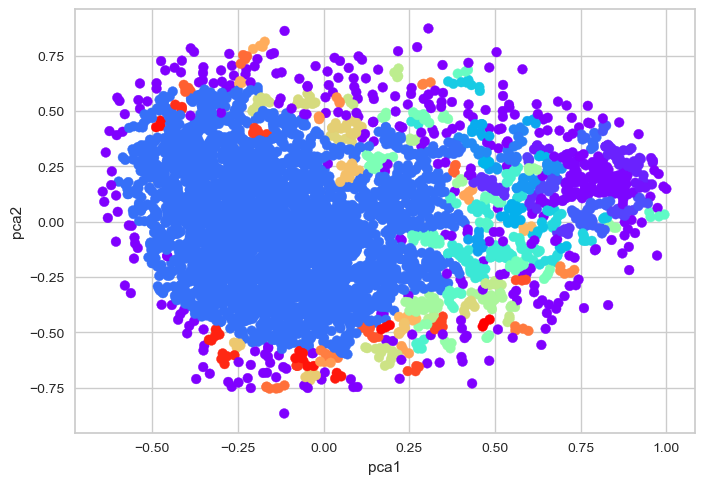

In [596]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=db_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [597]:
eps=0.025
for k in range(2,20):
    db_model=DBSCAN(eps=eps,min_samples=k).fit(pca_transformed)
    d_labels=db_model.labels_+1
    score=silhouette_score(pca_transformed,d_labels,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: -0.3638331570957349
for k 3 score: -0.2918923607527138
for k 4 score: -0.37900817681991616
for k 5 score: -0.38564408002316486
for k 6 score: -0.3963933700026135
for k 7 score: -0.41283639360683494
for k 8 score: -0.4684938464593116
for k 9 score: -0.5060589906377703
for k 10 score: -0.5036493943718998
for k 11 score: -0.510044273018271
for k 12 score: -0.48459494886963145
for k 13 score: -0.46149534432691464
for k 14 score: -0.39949542738080657
for k 15 score: -0.39092860308707394
for k 16 score: -0.37015946335277927
for k 17 score: -0.39938160973839204
for k 18 score: -0.4213879197143534
for k 19 score: -0.451960350468977


# Best Model : KMeans Clustering

In [630]:
k_labels

array([1, 1, 1, ..., 2, 0, 2])

In [631]:
scaled_data["clusters"]=k_labels
scaled_data["ratings"]=ratings
scaled_data

budget  original_language  popularity   revenue   runtime    status  \
0     0.189398          -0.005767    0.145648  0.610024  0.097101 -0.000561   
1     0.592719          -0.013768    0.316658  0.467606  0.262067 -0.001340   
2     0.543955          -0.015935    0.266200  0.490891  0.198228 -0.001551   
3     0.422029          -0.012076    0.213576  0.468982  0.214699 -0.001175   
4     0.843704          -0.023072    0.094820  0.169802  0.171092 -0.002246   
...        ...                ...         ...       ...       ...       ...   
4414 -0.148585          -0.042869   -0.189841 -0.066393 -0.139827 -0.004173   
4415 -0.215721          -0.038716    0.000635 -0.146805 -0.381598 -0.003768   
4416 -0.247466           0.056897   -0.079451 -0.166620 -0.384347 -0.004350   
4417 -0.131246          -0.056293   -0.243405 -0.128850  0.205302 -0.005479   
4418 -0.150175          -0.056550   -0.239066 -0.138506 -0.326518 -0.005504   

      vote_average  vote_count     title  release_year  release_month  \
0         0.037379    0.324642 -0.054360      0.020036       0.034958   
1         0.062918    0.263060  0.015095      0.033804      -0.043633   
2         0.011909    0.301702  0.057164      0.104054       0.096587   
3         0.109044    0.514061  0.068258      0.060406       0.006316   
4        -0.012155    0.161610 -0.054182      0.115409       0.012068   
...            ...         ...       ...           ...            ...   
4414     -0.049895   -0.163297 -0.396018     -0.156763       0.180706   
4415      0.176928   -0.017915  0.052662      0.035900       0.091724   
4416      0.118816   -0.116284 -0.261840     -0.231709      -0.224134   
4417      0.293120   -0.212998  0.173958      0.310251       0.341216   
4418      0.042264   -0.211089 -0.007138      0.081241      -0.179217   

      genre_type  production_country  lead_name  production_company  \
0      -0.041706            0.020127   0.043342           -0.014489   
1      -0.080647            0.048048  -0.008309            0.114575   
2      -0.115232            0.050179  -0.104719           -0.132306   
3      -0.087330            0.042145  -0.089575           -0.013934   
4      -0.166848            0.080519   0.214369            0.192006   
...          ...                 ...        ...                 ...   
4414    0.043369            0.149607  -0.274474           -0.473876   
4415    0.517875            0.135112   0.313873            0.263674   
4416   -0.323175           -0.179131  -0.366040           -0.371062   
4417   -0.175067            0.196455  -0.272690           -0.271435   
4418   -0.020482            0.197351  -0.317658            0.523417   

      lead_chatacter_name  directors    profit  clusters ratings  
0               -0.007605  -0.017423  0.667354         1    Good  
1               -0.111389  -0.056821  0.383155         1    Good  
2               -0.019533   0.114557  0.424693         1    Good  
3               -0.102469  -0.096591  0.433754         1    Good  
4               -0.002309  -0.242945 -0.041170         1    Poor  
...                   ...        ...       ...       ...     ...  
4414             0.401690  -0.431336 -0.035918         0    Poor  
4415            -0.431626   0.295625 -0.111789         0    Good  
4416            -0.209859   0.292288 -0.126123         2    Good  
4417             0.287707   0.417271 -0.114783         0    Good  
4418            -0.128714  -0.510648 -0.120775         2    Good  

[4419 rows x 20 columns]

In [632]:
for i in set(k_labels):
    df=scaled_data["ratings"][(scaled_data["clusters"]==i) & (scaled_data["ratings"]=="Good")]
    print("cluster",i,",rows",df.shape[0])
    

cluster 0 ,rows 1158
cluster 1 ,rows 759
cluster 2 ,rows 505


In [633]:
for i in set(k_labels):
    df=scaled_data["ratings"][(scaled_data["clusters"]==i) & (scaled_data["ratings"]=="Poor")]
    print("cluster",i,",rows",df.shape[0])

cluster 0 ,rows 645
cluster 1 ,rows 254
cluster 2 ,rows 1098


                                     Good ratings                                            Poor ratings 


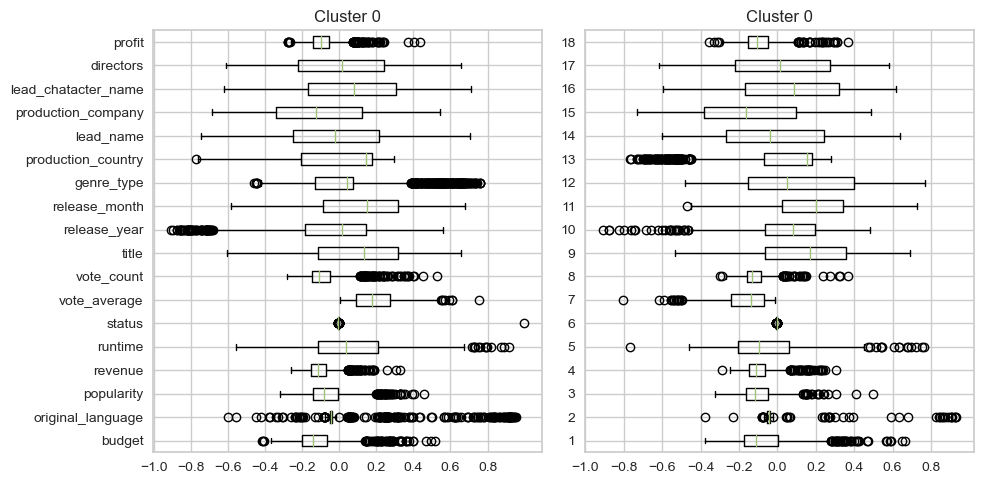

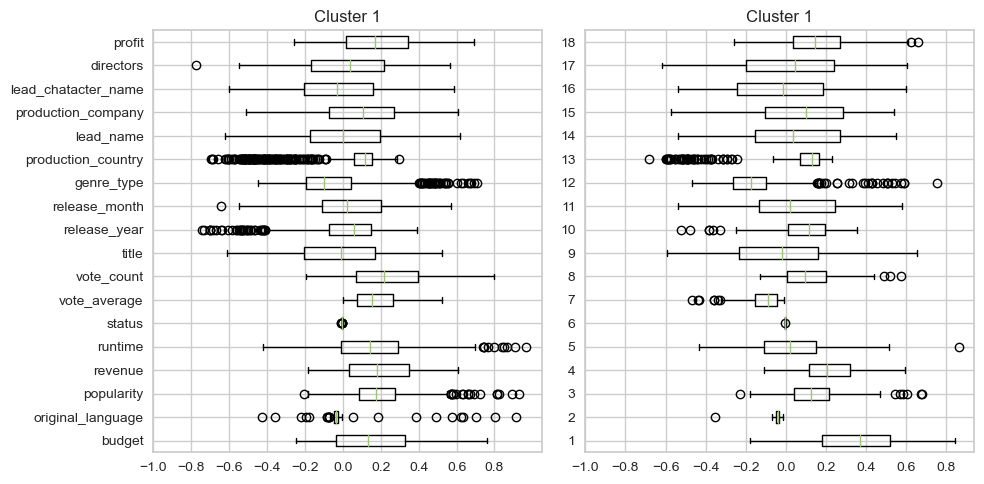

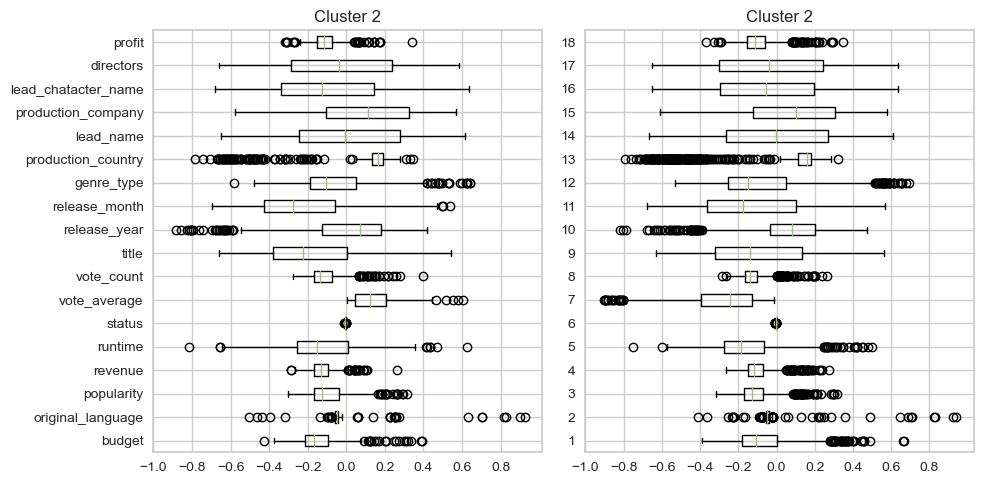

In [634]:


start = "\033[1m"
end = "\033[0;0m"
print(" "*35,start,"Good ratings",end," "*40,start,"Poor ratings",end)

for i in set(k_labels):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax=ax.ravel()
    
    good_cond=(scaled_data["clusters"]==i) & (scaled_data["ratings"]=="Good")
    ax[0].boxplot(scaled_data[scaled_data.iloc[:,:-2].columns][good_cond],labels=scaled_data.iloc[:,:-2].columns,vert=False)
    ax[0].set_title(f"Cluster {i}")
    ax[0].set_xticks(np.arange(-1,1,0.2))
    
    
    poor_cond=(scaled_data["clusters"]==i) & (scaled_data["ratings"]=="Poor")
    ax[1].boxplot(scaled_data[scaled_data.iloc[:,:-2].columns][poor_cond],vert=False)
    ax[1].set_title(f"Cluster {i}")
    ax[1].set_xticks(np.arange(-1,1,0.2))
    
    plt.tight_layout()

1.   Genre type is a important factor for rating , the distributions of values are different in cluster 0 and cluster 1.

2.   Old movies contains high ratings.

3.   Chances of good rating is more for high run time movies.

4.   If the popularity of the movie is high then it will be a good rating movie.

5.   If Budget of the movie is  high then it can be bad rating movie.


## So above features are the reason behind a good rating movie